# ПРОЕКТ - МАШИННОЕ ОБУЧЕНИЕ. Яндекс Практикум

# Культурист-датасаентист

## Описание проекта:
<a name='goal'></a>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
___________________________________________________________

**Задачи:** 
1) Спрогнозировать вероятность оттока клиентов из фитнес-центра;\
2) Выделить наиболее яркие группы клиентов и составить их "портрет";\
3) Выделить и описать основные признаки, влияющие на отток клиентов из центра;\
4) Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
* а) выделить целевые группы клиентов;
* б) предложить меры по снижению оттока;
* в) определить другие особенности взаимодействия с клиентами.
_____________________________________________________________
**Цель:**
Улучшить показатели финтнес-центров по "удержанию" клиентов. 


## Содержание
<a name='list'></a>

1. [Описание проекта](#goal)
2. [Содержание](#list)
3. [Загрузка данных, библиотек](#download)
4. [EDA (Исследовательский анализ данных)](#EDA)
   1. [Описание данных](#desc)
   2. [Находим различия](#dif)
   3. [Матрица корреляций](#corr)
5. [Модель прогнозирования оттока клиентов](#model)
   1. [Обучение и оценка качества модели](#priznaki)
   2. [Кластеризация клиентов](#clasters)
   3. [Распределение признаков в кластере](#priznak)
6. [Общий вывод:](#end)   

## Загрузка данных, библиотек
<a name='download'></a>

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 1.2 MB/s eta 0:00:01


In [3]:
#Все нужные библиотеки загружаем одним окном
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sweetviz as sv


In [4]:
#Загрузим данные и создадим наш датафрейм, получим основную информацию о нём

df = pd.read_csv('/datasets/gym_churn.csv')

In [5]:
# Применим метод shape, выведем первые строки фрейма данных

display("Размер датафрейма:", df.shape)

display(df.sample(5))

'Размер датафрейма:'

(4000, 14)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
2643       1              1        0              0      1                1   
886        1              1        1              0      1               12   
243        0              1        1              1      1               12   
2707       1              1        0              0      1                1   
2903       0              0        0              0      1                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
2643             1   30                    158.125587                    1.0   
886              1   26                     80.662382                   12.0   
243              0   26                    215.476576                    9.0   
2707             1   24                     27.538485                    1.0   
2903             0   30                     18.164882                    1.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
2643         0                   1.690530                           1.532906   
886          1                   0.326090                           0.000000   
243          7                   2.454228                           2.229718   
2707         1                   1.832798                           1.145567   
2903         7                   3.599100                           3.722411   

      Churn  
2643      1  
886       1  
243       0  
2707      1  
2903      0

**Опишем, какие поля имеем и что они означают:**
_______________

Данные клиента за предыдущий до проверки факта оттока месяц:\
`'gender'` — пол;\
`'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;\
`'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);\
`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);\
`'Phone' `— наличие контактного телефона;\
`'Age'` — возраст;\
`'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).
___________________________________
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:\
`'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);\
`'Month_to_end_contract' `— срок до окончания текущего действующего абонемента (в месяцах);\
`'Group_visits'` — факт посещения групповых занятий;\
`'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;\
`'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;\
`'Avg_additional_charges_total' `— суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.\
`'Churn'` — факт оттока в текущем месяце.

## EDA (Исследовательский анализ данных)
<a name='EDA'></a>

In [6]:
df.info() #посмотрим общую информацию о полученном нами сете данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

На первый взгляд пропусков не имеем (4000 строк имеют не нулевые значения)

In [7]:
df.isnull().sum() #посчитаем, действительно ли нет пропусков (на всякий случай)

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропусков нет

Приведём название столбцов к нижнему регистру

In [8]:
df = df.rename(columns=lambda x: x.lower())
df

gender  near_location  partner  promo_friends  phone  contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0                1   29                     14.227470                    5.0   
1                1   31                    113.202938                   12.0   
2                0   28                    129.448479                    1.0   
3                1   33                     62.669863                   12.0   
4                0   26                    198.362265                    1.0   
...            ...  ...                           ...                    ...   
3995             0   33                      2.406023                   12.0   
3996             1   29                     68.883764                    1.0   
3997             0   28                     78.250542                   11.0   
3998             0   32                     61.912657                    5.0   
3999             1   30                    178.861814                   12.0   

      lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0            3                   0.020398                           0.000000   
1            7                   1.922936                           1.910244   
2            2                   1.859098                           1.736502   
3            2                   3.205633                           3.357215   
4            3                   1.113884                           1.120078   
...        ...                        ...                                ...   
3995         8                   2.284497                           2.349070   
3996         1                   1.277168                           0.292859   
3997         2                   2.786146                           2.831439   
3998         3                   1.630108                           1.596237   
3999         1                   1.101832                           1.035270   

      churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3995      0  
3996      1  
3997      0  
3998      0  
3999      0  

[4000 rows x 14 columns]

### Описание данных
<a name='desc'></a>

In [9]:
df.gender.unique() # изучим категориальные переменные

array([1, 0])

In [10]:
df.gender.value_counts(normalize = True) #посчитаем сколько человек попало в ту или иную категорию

1    0.51025
0    0.48975
Name: gender, dtype: float64

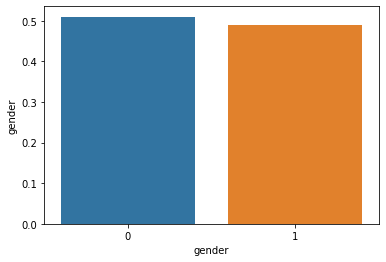

In [11]:
sns.barplot(x = df.gender, y = df.gender.value_counts(normalize = True));

Мужчин и женщин, которые имеют абонименты в спорт зал - примерно равное количество

In [12]:
df.near_location.unique()

array([1, 0])

In [13]:
df.near_location.value_counts(normalize = True)

1    0.84525
0    0.15475
Name: near_location, dtype: float64

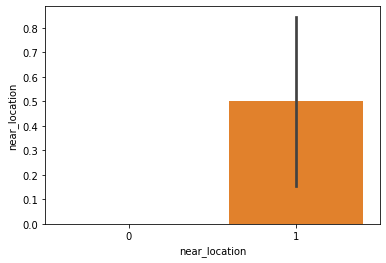

In [14]:
sns.barplot(x = df.near_location, y = df.near_location.value_counts(normalize = True));

Точно не оговорено, но скорее всего 1 - обозначает что клиент живет или работает в районе фитнес-зала. Мы видим, что, в основном, клиенты проживают или работают рядом с клубом (84 % клиентов).

In [15]:
df.partner.unique()

array([1, 0])

In [16]:
df.partner.value_counts(normalize = True)

0    0.51325
1    0.48675
Name: partner, dtype: float64

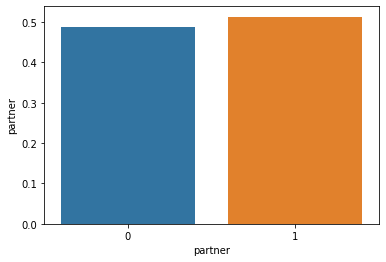

In [17]:
sns.barplot(x = df.partner, y = df.partner.value_counts(normalize = True));

Клиенты примерно поровну разделились на тех, кто является сотрудником компании партнёра фитнес-зала и тех, кто не является сотрудниками компаний партнёров, следовательно, фитнес-зал не имеет сведений о работодателе половины своих клиентов. 

In [18]:
df.promo_friends.unique()

array([1, 0])

In [19]:
df.promo_friends.value_counts(normalize = True)

0    0.6915
1    0.3085
Name: promo_friends, dtype: float64

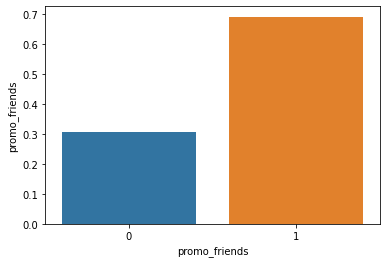

In [20]:
sns.barplot(x = df.promo_friends, y = df.promo_friends.value_counts(normalize = True));

Менее половины клиентов пришли по акции "Приведи друга" (30%). Большая часть клиентов пришла в клуб без акции (70%)

In [21]:
df.phone.unique()

array([0, 1])

In [22]:
df.phone.value_counts(normalize = True)

1    0.9035
0    0.0965
Name: phone, dtype: float64

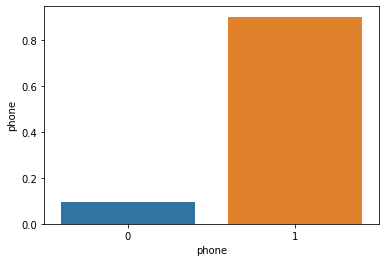

In [23]:
sns.barplot(x = df.phone, y = df.phone.value_counts(normalize = True));

Практически все клиенты передали фитенс-клубу свой номер телефона, не известен номер телефона только у 9 % клиентов.

In [24]:
df.group_visits.value_counts()

0    2351
1    1649
Name: group_visits, dtype: int64

Менее половины клиентов посещают групповые занатия

In [25]:
df.churn.value_counts(normalize = True)

0    0.73475
1    0.26525
Name: churn, dtype: float64

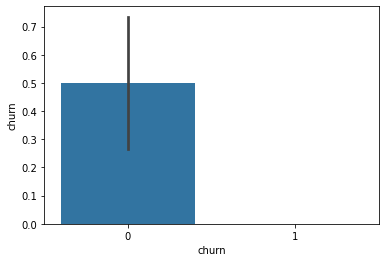

In [26]:
sns.barplot(x = df.churn, y = df.churn.value_counts(normalize = True));

27% клиентов уйдет из спорт зала в следующем месяце. Фактом оттока считается непосещение клиентом спорт зала месяц и более. 

In [27]:
#посмотрим количественные данные
df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']].describe(percentiles = [0.2, 0.4, 0.99]).round(2).T

count    mean    std    min    20%  \
contract_period                    4000.0    4.68   4.55   1.00   1.00   
age                                4000.0   29.18   3.26  18.00  26.00   
avg_additional_charges_total       4000.0  146.94  96.36   0.15  55.80   
month_to_end_contract              4000.0    4.32   4.19   1.00   1.00   
lifetime                           4000.0    3.72   3.75   0.00   1.00   
avg_class_frequency_total          4000.0    1.88   0.97   0.00   1.04   
avg_class_frequency_current_month  4000.0    1.77   1.05   0.00   0.79   

                                      40%     50%     99%     max  
contract_period                      1.00    1.00   12.00   12.00  
age                                 28.00   29.00   37.00   41.00  
avg_additional_charges_total       109.33  136.22  401.00  552.59  
month_to_end_contract                1.00    1.00   12.00   12.00  
lifetime                             2.00    3.00   17.00   31.00  
avg_class_frequency_total            1.59    1.83    4.20    6.02  
avg_class_frequency_current_month    1.44    1.72    4.19    6.15

In [28]:
df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']].median().round(1)

contract_period                        1.0
age                                   29.0
avg_additional_charges_total         136.2
month_to_end_contract                  1.0
lifetime                               3.0
avg_class_frequency_total              1.8
avg_class_frequency_current_month      1.7
dtype: float64

И так, теперь мы знаем, что лишь 1% клиентов заключат контракт с центром на год, менее 50 % клиентов имеют контракт с центром всего на 1 месяц. 99 % клиентов младше 37 лет, в среднем, возраст клиентов составляет 29 лет. Младше 26 лет всего 20% и менее клинетов. В среднем, клиенты покупают дополнительных услуг в центре на 147 долларов, а если верить медиане - 136 доларов. Менее 40% клиентов тратят меньше 109 долларов в месяц. Лишь 1 % клиентов оставляет более 400 долларов на доп.услуги в центре. Лишь 1 % клиентов имеет более 12 месяцев до окончания контракта, в основном, контракт истекает у клиентов через 1-4 месяца от времени исследования, менее 50% клиентов имеют срок истечения контракта 1 месяц и менее. С момента первого обращения в фитнес-центр в среднем у всех прошло 3 месяца, менее 40% клиентов обратились в зал 2 месяца назад и 20% меньше месяца назад, 99% клиентов обратились менее 17 месяцев назад. Средняя частота посещений в зал за прошлую неделю составила - 1.8 дней, лишь 1 % клиентов посетило зал более 4 дней. В среднем, клиенты посещают фитнес центр 1,7 дней в неделю.

In [29]:
# воспользуемся функцией histogram()
px.histogram(df, # передав ей датафрейм,
             x = 'contract_period', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

На графике мы увидели, что меньше всего человек имеет контракт с центром на пол года. Чуть больше на 12 месяцев. В основном контрактный период составляет 1 месяц. 

In [30]:
# воспользуемся функцией histogram()
px.histogram(df, # передав ей датафрейм,
             x = 'age', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

Основной возраст клиентов действительно составляет 25-35 лет. Младше и старше - можно отнести к выбросам.
______________________________________
Добавим новый столбец в наш датафрейм, он будет категориальным - там мы разобьём клиентов на 3 группы: группа 1 - клиенты младше 25, группа 2 - клиенты  25-35 лет включительно, группа 3 - клиенты старше 35 лет. 

In [31]:
# создадим функцию categorize_age()
def categorize_age(row):
    if row < 25:
        return 1
    if row > 35:
        return 3
    return 2

In [32]:
# применим функцию методом apply()
df['age_category'] = df['age'].apply(categorize_age)

In [33]:
px.histogram(df, # передав ей датафрейм,
             x = 'avg_additional_charges_total', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

диаграмма скошена вправо, к выбросам можно отнести чеки на 400 и более долларов в месяц (траты на доп.услуги в центре). В овновном клиенты оставляют от 100 до 200 долларов в месяц на доп услуги.

In [34]:
px.histogram(df, # передав ей датафрейм,
             x = 'month_to_end_contract', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

До окончания контракта либо 12, либо 6, либо 1 месяц. В основном - 1 месяц. 

In [35]:
px.histogram(df, # передав ей датафрейм,
             x = 'lifetime', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

В основном в фитнес студии - новые клиенты. Время "жизни" их составляет менее 5 месяцев. Тех, кто посещают зал более 10 месяцев можно назвать нестандартными клиентами. 

In [36]:
px.histogram(df, # передав ей датафрейм,
             x = 'avg_class_frequency_total', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

В целом, в основном клиенты посещают зал 1-2 раза в неделю. Реже - 3. Остальные клинеты - не типичны для данного фитнес-зала. 

In [37]:
px.histogram(df, # передав ей датафрейм,
             x = 'avg_class_frequency_current_month', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

In [38]:
px.histogram(df, # передав ей датафрейм,
             x = 'avg_class_frequency_current_month', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

Что подтверждено и за неделю и за месяц. 

In [39]:
grouped_df = df.groupby(['churn']).describe()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(grouped_df)

gender                                              near_location  \
        count      mean       std  min  25%  50%  75%  max         count   
churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                                                   partner            \
           mean       std  min  25%  50%  75%  max   count      mean   
churn                                                                  
0      0.873086  0.332933  0.0  1.0  1.0  1.0  1.0  2939.0  0.534195   
1      0.768143  0.422217  0.0  1.0  1.0  1.0  1.0  1061.0  0.355325   

                                         promo_friends                      \
            std  min  25%  50%  75%  max         count      mean       std   
churn                                                                        
0      0.498914  0.0  0.0  1.0  1.0  1.0        2939.0  0.353522  0.478144   
1      0.478837  0.0  0.0  0.0  1.0  1.0        1061.0  0.183789  0.387495   

                                 phone                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
churn                                                                       
0      0.0  0.0  0.0  1.0  1.0  2939.0  0.903709  0.295040  0.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  1.0  1061.0  0.902922  0.296204  0.0  1.0  1.0   

                contract_period                                           \
       75%  max           count      mean       std  min  25%  50%   75%   
churn                                                                      
0      1.0  1.0          2939.0  5.747193  4.716942  1.0  1.0  6.0  12.0   
1      1.0  1.0          1061.0  1.728558  2.132371  1.0  1.0  1.0   1.0   

            group_visits                                                  age  \
        max        count      mean       std  min  25%  50%  75%  max   count   
churn                                                                           
0      12.0       2939.0  0.464103  0.498795  0.0  0.0  0.0  1.0  1.0  2939.0   
1      12.0       1061.0  0.268615  0.443448  0.0  0.0  0.0  1.0  1.0  1061.0   

                                                          \
            mean       std   min   25%   50%   75%   max   
churn                                                      
0      29.976523  3.009933  19.0  28.0  30.0  32.0  41.0   
1      26.989632  2.895163  18.0  25.0  27.0  29.0  38.0   

      avg_additional_charges_total                                   \
                             count        mean        std       min   
churn                                                                 
0                           2939.0  158.445715  99.801599  0.171862   
1                           1061.0  115.082899  77.696419  0.148205   

                                                    month_to_end_contract  \
             25%         50%         75%        max                 count   
churn                                                                       
0      76.920993  149.881171  224.448274  552.59074                2939.0   
1      50.629127  103.814686  165.616858  425.53522                1061.0   

                                                     lifetime            \
           mean       std  min  25%  50%   75%   max    count      mean   
churn                                                                     
0      5.283089  4.363522  1.0  1.0  6.0  10.0  12.0   2939.0  4.711807   
1      1.662582  1.964593  1.0  1.0  1.0   1.0  12.0   1061.0  0.990575   

                                          avg_class_frequency_total            \
            std  min  25%  50%  75%   max                     count      mean   
churn                                                                           
0      3.874780  0.0  2.0  4.0  6.0  31

Опишем полученную таблицу (сгруппированную по признаку "отток" или "остался"):\
У категориальных переменных среднее будет в диапозоне от 0 до 1 (так как в таблице они представлены 0 или 1). Чем больше значение mean к единице, тем больше людей с этим признаком.
____________
**Клиенты ушедшие в отток:**
В отток ушли 1000 человек. Большинство жили рядом со спортзалом (0.7 - среднее).\
Среди ушедших в отток клиенты в основном в спорт зал попали самостоятельно. По Партнерской программе (сотрудничество клуба с работодателем) пришли менее 25% клиентов. То есть об их рабочем месте ничего не известно.\
Среди ушедших очень мало клиентов попали в спорт зал по программе "приведи друга". Они туда приходили самотёком.\
В среднем - почти все эти клиенты предоставили свой номер телефона студии.\
В среднем - контрактный период клиентов, ушедших в отток составлял 1.7 +- 2.1 месяцев (то есть 3 месяца).\
Среди ушедших в отток - почти никто не ходил на групповые занятия (менее 25% клиентов).\
Средний возраст ушедших в отток составил 26 +-2,8 лет.\
В среднем, они оставляли 115 долларов на доп услуги.\
До конца контракта у них оставалось 1,6+-1.9 месяцев.\
В среднем они посещали зал 1.4 раза в неделю от начала покупки абонимента.\
В среднем они посетили зал 1 раз в неделю за последнюю неделю.\
\

**Клиенты оставшиеся в зале:**
Осталось 3000 клиентов. Они так же живут или работают поблизости от спорт зала.\
О половине клиентов известны сведенья об их работодателе.\
Небольшая часть из них пришли по приглашению "приведи друга".\
Практически все оставили свой номер телефона залу.\
В среднем они брали контракт на 6 месяцев.\
Почти половина из них любят посещать групповые занятия.\
В среднем им около 30 лет.\
Они оставляют 158 долларов на доп услуги в зале.\
В среднем до конца контракта у них 6 месяцев.\
В среднем они от начала контракта пробыли в зале около 4 месяцев.\
В среднем они посещают зал 2 раза в неделю.\


**ВЫВОД:** Из этого можно сделать такой вывод: люди, которые ушли в отток - молодые, и брали контракт примерно на 3 месяца, с более низким доходом (так как оставляют меньше денег на доп услуги центра). Люди, которые остаются - постарше, берут контракт на более длительное время (6 месяцев) и имеют более высокий доход (больше тратят в зале на доп услуги). 

### Находим различия
<a name='dif'></a>

Начнем с того, насколько пол влияет на вероятность уйти в следующем месяце.

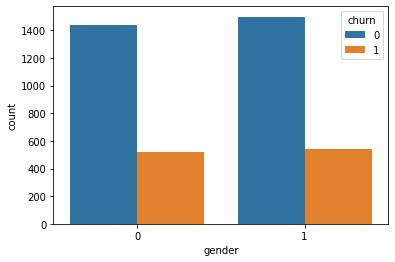

In [40]:
# создадим grouped countplot, где по оси x будет пол, а по оси y - количество людей
# в каждом классе данные разделены на мужчин (0) и женщин (1), а так же на 0 - не ушли, 1 - ушли
sns.countplot(x = 'gender', hue = 'churn', data = df);


Как видим, столбцы идентичны, видимо, пол не влияет на факт того - что в следующем месяце клиент покинет зал

Посмотрим, как влияет возраст на вероятность оттока клиентов. 

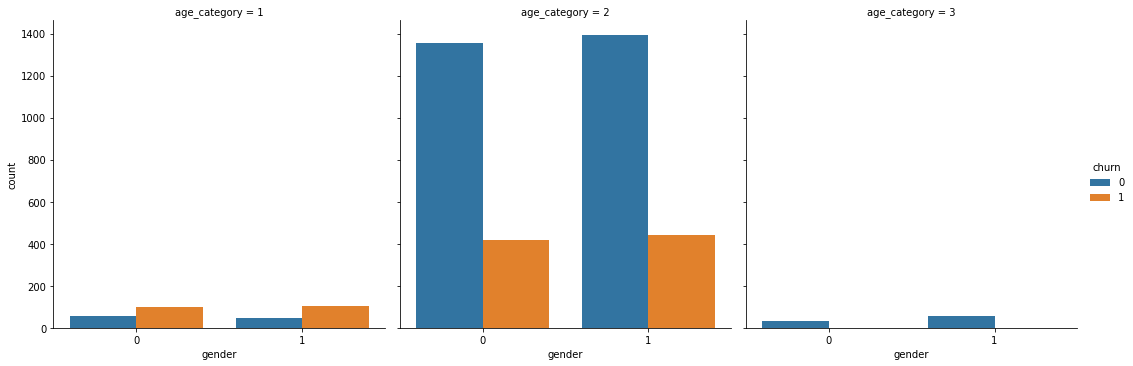

In [41]:
sns.catplot(x = 'gender', hue = 'churn', col = 'age_category', kind = 'count', data = df);


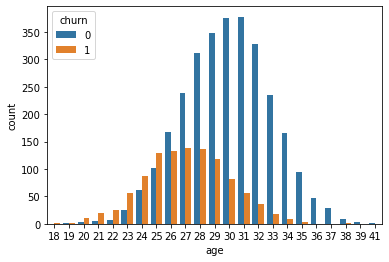

In [42]:
#посмотрим, как влияет возраст
sns.countplot(x = 'age', hue = 'churn', data = df);

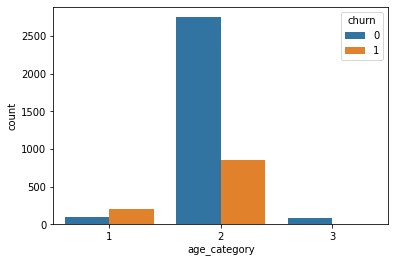

In [43]:
sns.countplot(x = 'age_category', hue = 'churn', data = df);

Появилась интересная тенденция. Клиенты старше 35 достаточно редко "отваливаются" и продолжают заниматься в спорт зале. А вот если клиент находится в границах 25-30 лет, то у него самая высокая вероятность "отвалиться". В целом, 2 категория клиентов (25-35) довольно часто уходит из спорт зала. Клиенты младше 25 - вообще показали, что вероятность того, что он останется в спорт зале - крайне мала. Вероятность того, что он уйдет в отток (если его возраст ниже 25) - огромная. Стоит обратить внимание на эту категорию. 
______________

Вывод: пол не влияет на вероятность оттока, а вот возраст - очень даже. 

In [44]:
# создадим таблицу сопряженности
# в параметр index мы передадим данные по оттоку, в columns - по категории возраста
table_age = pd.crosstab(index = df.churn, columns = df.age_category)
 
# создадим названия 
table_age.index = ['остался', 'отток']
table_age.columns = ['25<', '25-35', '35+']
 
# выведем результат
table_age

25<  25-35  35+
остался  103   2746   90
отток    202    858    1

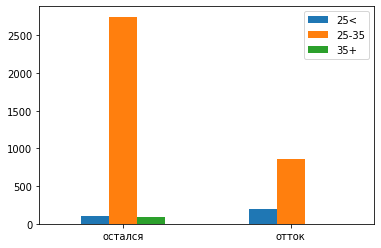

In [45]:
table_age.plot.bar(rot = 0);

Для того, чтобы лучше понять ситуацию, посмотрим данные не в абсолютных, а в относительных единицах

In [46]:
# сумма по строкам в этом случае должна быть равна единице
age_rel = pd.crosstab(index = df.churn,
                         columns = df.age_category,
                         normalize = 'columns')
 
age_rel.index = ['остался', 'отток']
age_rel.columns = ['25<', '25-35', '35+']
age_rel

25<     25-35       35+
остался  0.337705  0.761931  0.989011
отток    0.662295  0.238069  0.010989

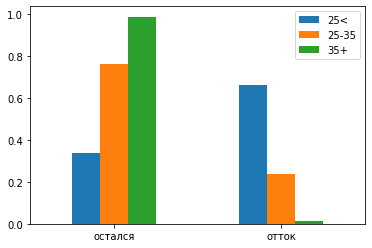

In [47]:
age_rel.plot.bar(rot = 0);

В общем мы подтвердили что, среди клиентов 25 и ниже - процент оттока самый высокий и превышает процент тех, кто остается. Среди клиентов 35+ процент оттока практически =0. Клиенты возрастной категории 25-35 все же чаще остаются, но шансы на то, что они уйдут, практически 50 / 50. 

Проиллюстрируем нашу догадку, что чем меньше клиентов оставляет сверх.расходов в зале - тем чаще они попадают в "отток". 

In [48]:
mpl.rcParams['figure.figsize'] #смотрим, какой размер графиков задан автоматически

[6.0, 4.0]

In [49]:
# изменим размер обновив словарь в параметре rc функции sns.set()
sns.set(rc = {'figure.figsize' : (7, 5)})
 
# посмотрим на результат
mpl.rcParams['figure.figsize']

[7.0, 5.0]

In [50]:
# отфильтруем данные по отток или остался и построим гистограммы по столбцу avg_additional_charges_total
px.histogram(df, x = 'avg_additional_charges_total', color = 'churn', nbins = 8)

Мы видим, что клиенты, которые оставляют более 250 долларов в доп расходах в зале реже попадают в отток, клиенты, которые оставляют меньше 150 долларов - чаще попадают в отток. Возможно, этот параметр всё-таки важен. 

Посмотрим, как влияет время с момента первого обращения в фитнес-центр (в месяцах) на отток.

In [51]:
px.histogram(df, x = 'lifetime', color = 'churn', nbins = 10)

Получается, вероятность того, что человек уйдет в "отток" самая высокая в первые 5 месяцев от начала занятий в фитнес-центре впервые. Если клиент продержался эти пол года - вероятность того, что он уйдет - практически нивелируется.

Посмотрим, как влияет факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента) на то, уйдет клиент или нет.

In [52]:
px.histogram(df, x = 'promo_friends', color = 'churn', nbins = 2)

Сложно сказать, влияет ли это, так как в целом, клиентов по акции практически на 1000 меньше. 

In [53]:
# создадим таблицу сопряженности чтобы посмотреть относительные, а не абсолютные вел-ны

friend = pd.crosstab(index = df.churn, columns = df.promo_friends, normalize = 'columns')
 
# создадим названия 
friend.index = ['остался', 'отток']
friend.columns = ['не от друга', 'пришел от друга']
 
# выведем результат
friend

не от друга  пришел от друга
остался     0.686913         0.841977
отток       0.313087         0.158023

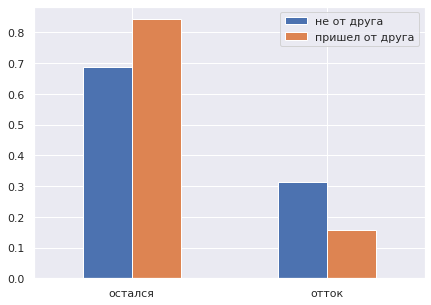

In [54]:
friend.plot.bar(rot = 0);

Интересное наблюдение, среди тех, кто попал по акции - 80% клиентов в клубе остается. А те, кто пришли самотёком - только 70 % остается в клубе. В отток попадают в основном те, кто пришел самотёком. Можно предположить, что если у тебя в фитнес-клубе есть друг, с которым ты занимаешься - это повышает вероятность того, что ты в этом клубе задержишься. 

Посмомтрим, как в относительных величинах влияет близость работы или проживания к клубу на отток.

In [55]:
# создадим таблицу сопряженности чтобы посмотреть относительные, а не абсолютные вел-ны

near = pd.crosstab(index = df.churn, columns = df.near_location, normalize = 'columns')
 
# создадим названия 
near.index = ['остался', 'отток']
near.columns = ['район клуба', 'далеко от клуба']
 
# выведем результат
near

район клуба  далеко от клуба
остался     0.602585         0.758947
отток       0.397415         0.241053

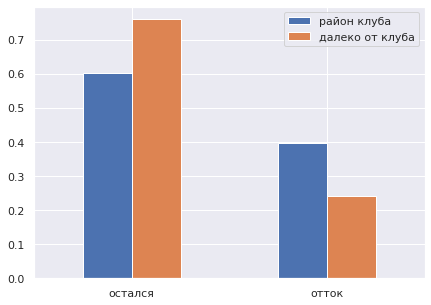

In [56]:
near.plot.bar(rot=0);

Как это ни странно, в процентном соотношении, среди тех, кто остался больше людей проживающих дальше от клуба. А в оттоке получилось, большинство людей проживающих или работающих в районе клуба. Это как со школой. Кто дальше всех живет - реже всех опаздывает. Высокая мотивация? Безнадежность? 

In [57]:
px.histogram(df, x = 'group_visits', color = 'churn', nbins = 2)

Отток выше у тех клиентов, которые не посещают групповые занятия. Возможно, здесь можно проследить взаимосвязь с тем, что чаще остаются те клиенты, у которых в фитнес-клубе есть друг и с ним интересно ходить на групповые занятия. А когда ты один, тебе грустно и одиноко в клубе, может быть у тебя больше комплексов, если ты толстый и один - очень грустно так заниматься, нужна поддержка. Видимо, это достаточно сильно влияет. 

In [58]:
px.histogram(df, x = 'partner', color = 'churn', nbins = 2)

Клиенты, которые являются сорудниками компаний партнёров клуба (явно не обозначено, но возможно это цифра 1) реже "утекают" из клуба. В клубе им предоставляют скидку и он близок к работе (скорее всего). Поэтому им выгодно (вероятно) ходить в этот клуб.

In [59]:
px.histogram(df, x = 'contract_period', color = 'churn', nbins = 10)

Имеем: если клиент составил контракт на 1 месяц, то имеется очень большая вероятность, что в следующем месяце он не вернётся. Если клиент составил контракт на 6 или 12 месяцев, то практически наверняка он не попадёт в отток. Всё-таки, уплаченных денег ему жаль. 

In [60]:
px.histogram(df, x = 'avg_class_frequency_current_month', color = 'churn', nbins = 10)

Если клиент посещает клуб чаще 2 раз в неделю - вероятность того, что он попадёт в отток нивелируется (видимо, такие люди в целом любят спорт и готовы работать). Если реже 2 - есть большая вероятность, что клиент в скором времени сольётся совсем (новая жизнь с понедельника так и не началась).

В общих чертах мы описали наши признаки, нашли интересные зависимости, что будем использовать в дальнейшем. Сейчас построим матрицу корреляций. Если мы найдём корреляции более 0.8 - удалим эти признаки. Так как обученная на подобных признаках модель будет выдавать не "реальные" результаты, так как подобные признаки ведут к "переобучению" моделей. 

### Матрица корреляций
<a name = 'corr'></a>

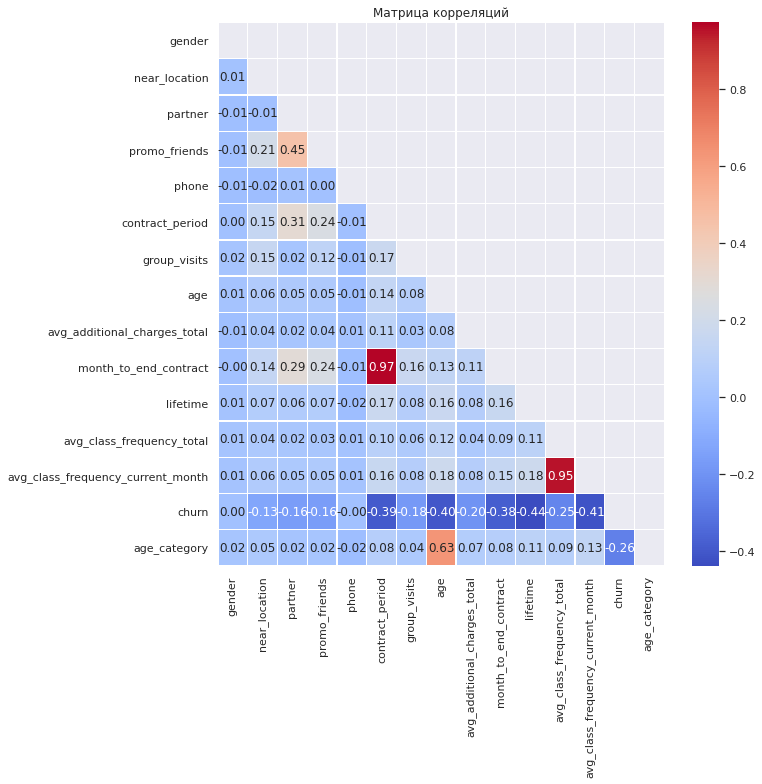

In [61]:
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, mask=mask, annot = True, fmt = '0.2f', linewidths=.3, cmap="coolwarm")
plt.title('Матрица корреляций')
plt.show()

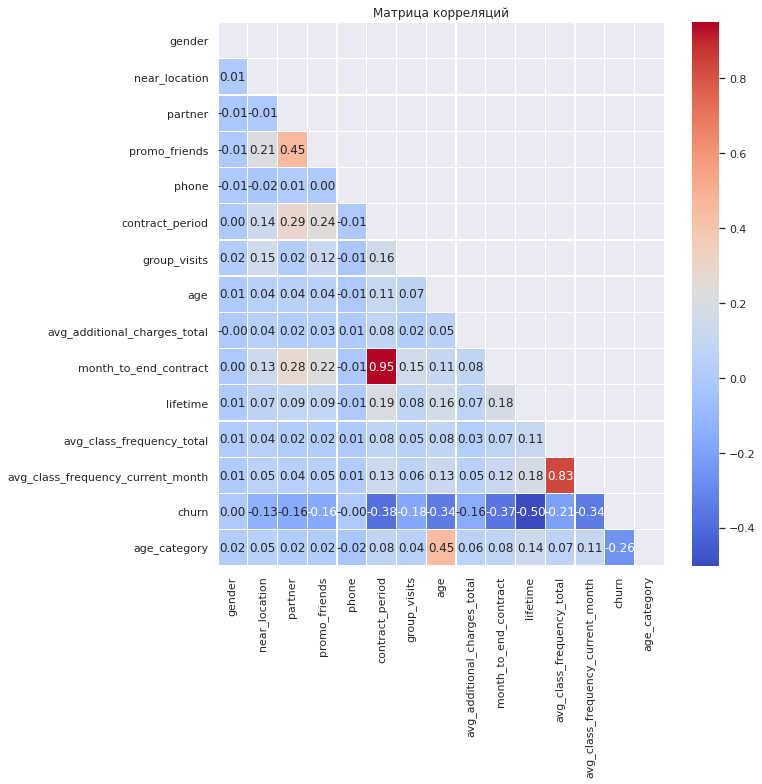

In [62]:
corr_matrix = df.corr(method='kendall')

plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, mask=mask, annot = True, fmt = '0.2f', linewidths=.3, cmap="coolwarm")
plt.title('Матрица корреляций')
plt.show()

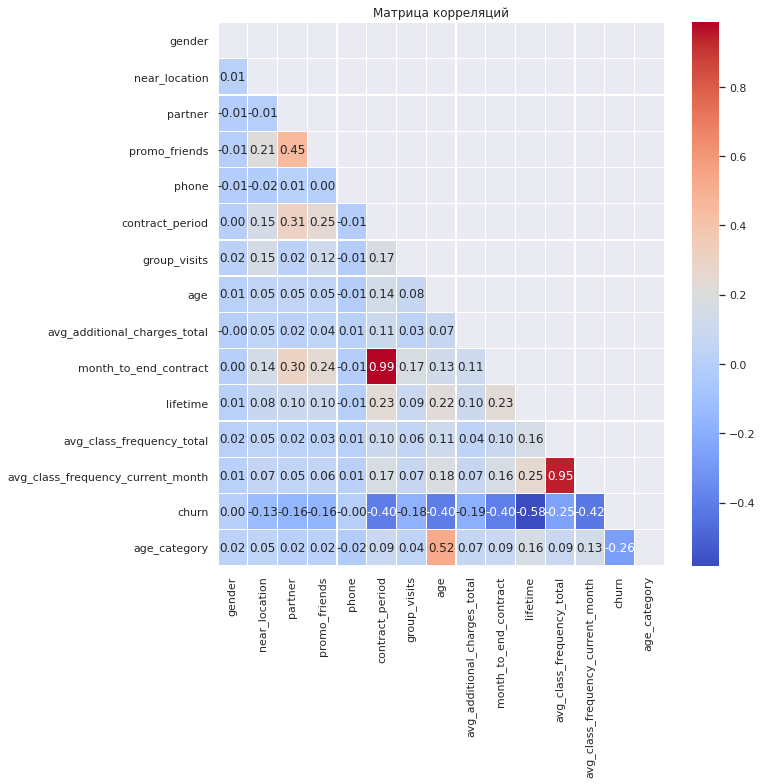

In [63]:
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, mask=mask, annot = True, fmt = '0.2f', linewidths=.3, cmap="coolwarm")
plt.title('Матрица корреляций')
plt.show()

Вообще, данные не были утверждены как "нормально" распределённые, поэтому, помимо корреляции по Пирсону, мы посмотрели и другие виды корреляций, для того, чтобы быть более уверенные в том, какие признаки стоит удалить, чтобы не переобучить модель. Но всё сошлось на 2 признаках, чья корреляция оказалась более 0.8 во всех трёх методах:\
`month_to_end_contract` и `avg_class_frequency_current_month`. По-видимому, от них необходимо избавиться, чтобы модели были более достоверными.
_______________________________

Кстати, отметим интересные моменты, выявленые на матрице корреляций:\
Корреляций особенных и нет. За исключением, упомянутых выше, количество месяцев до окончания контракта коррелирует с периодом контракта, прямая корреляция. Чем больше месяцев до окончания контракта - тем на большее количество месяцев заключен контракт. Логично. Веротяно, данные были отобраны в каком-то начале заключения контрактов с клубом вообще (для всех 4000 клиентов). Так же имеют высокую прямую корреляцию частота посещений клуба на это неделе и за прошлый месяц. Клиенты держатся своих привычек и не меняют её от месяца к месяцу, стабильно посещая клуб в среднем 2 раза в неделю. Иных корреляций не наблюдаем. 

In [64]:
df = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

дропнули признаки, которые могут переобучить нашу модель.

## Mодель прогнозирования оттока клиентов
<a name='model'></a>

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце (согласно задаче, которую перед нами поставил заказчик). 

In [65]:
#Разделим данные на признаки (матрица x) и целевую переменную (y)
x = df.drop(['churn', 'age_category'], axis = 1)
y = df['churn']

#Разделим выборку на обучающую 80% и валидационную 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

#Cтандартизируем данные
scaler = StandardScaler()
scaler.fit(x_train)

x_train_st = scaler.transform(x_train) #обучающая выборка
x_test_st = scaler.transform(x_test) #тестовая выборка

In [66]:
report = sv.analyze([df, "churn"])

                                             |          | [  0%]   00:00 -> (? left)


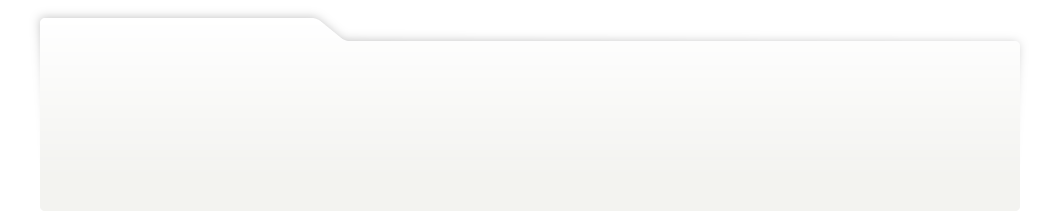
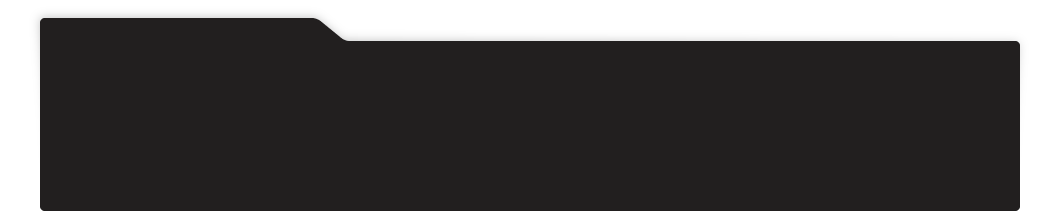
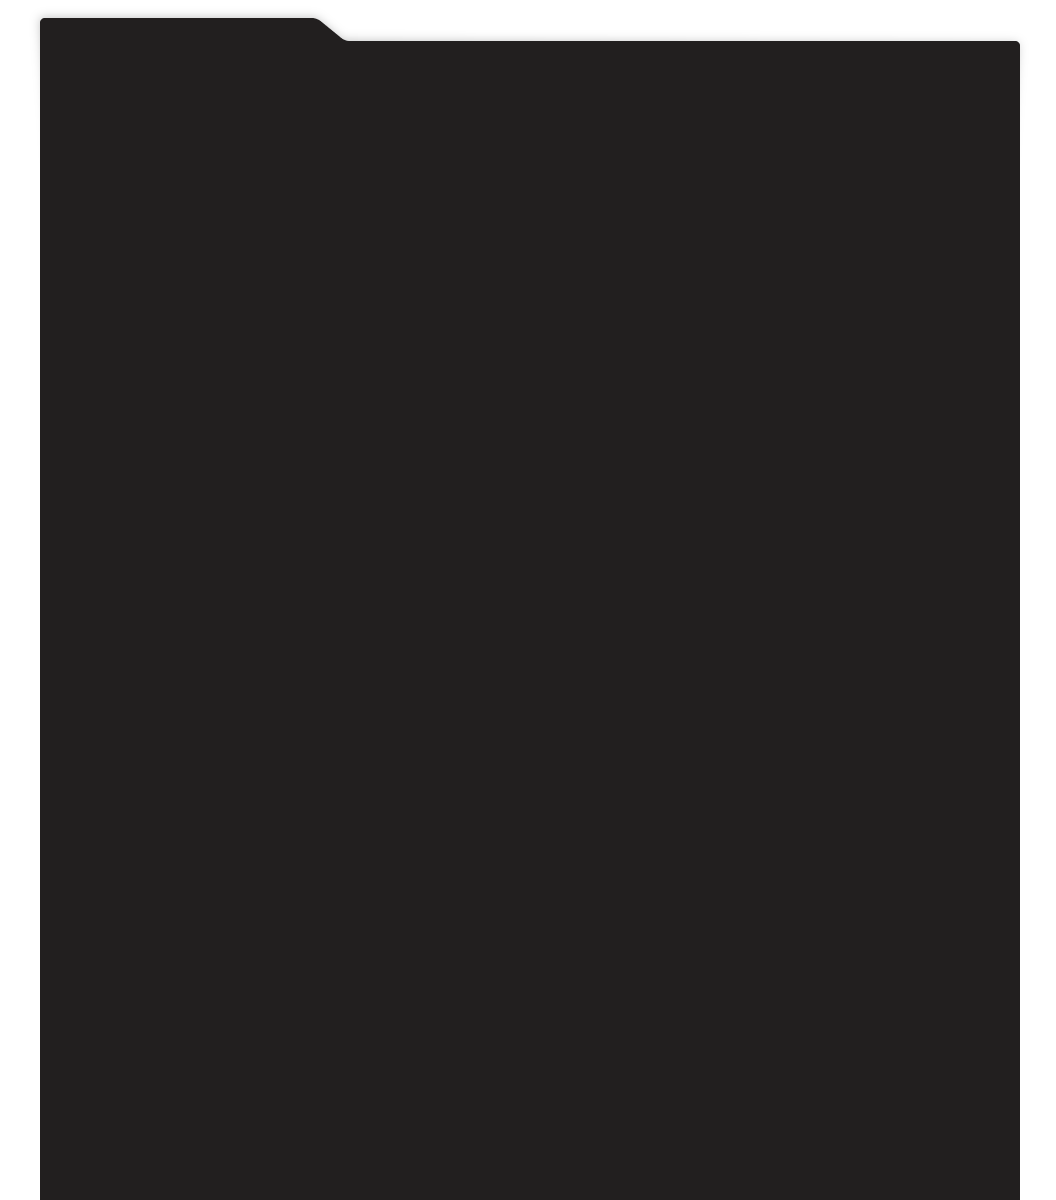
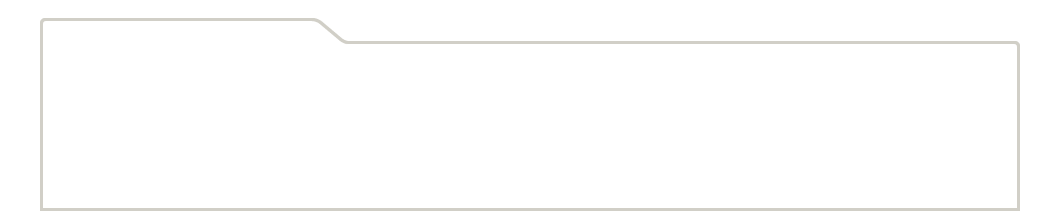
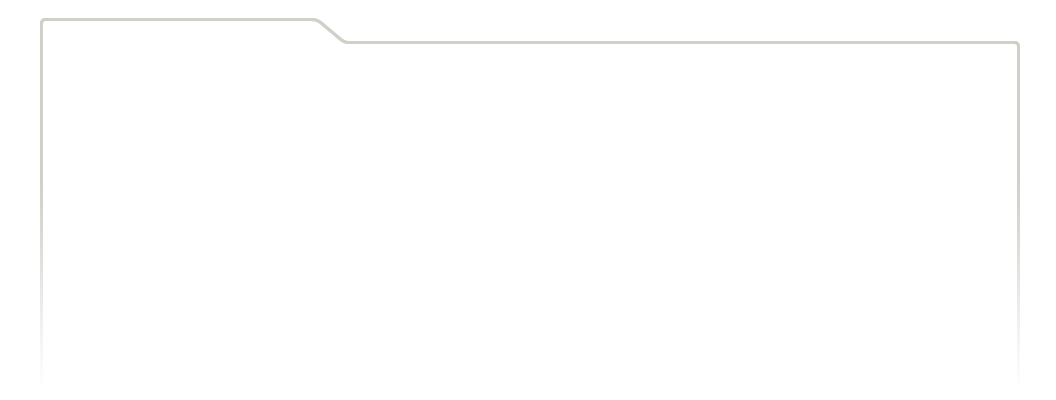
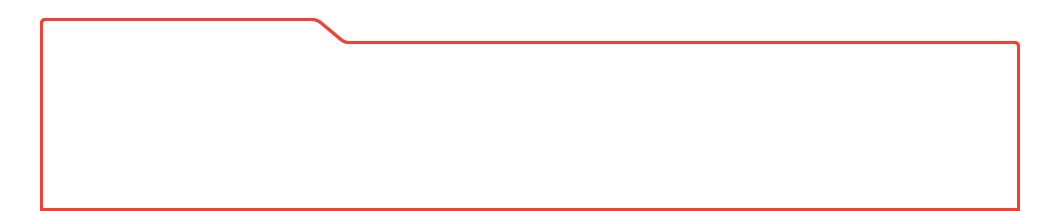
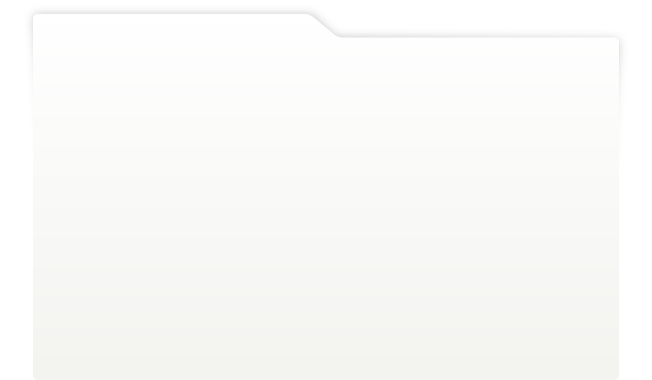
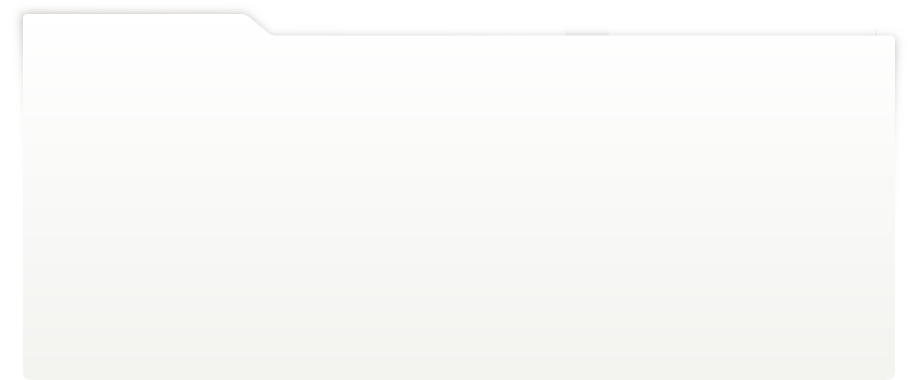
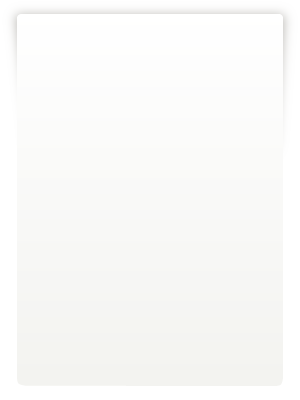
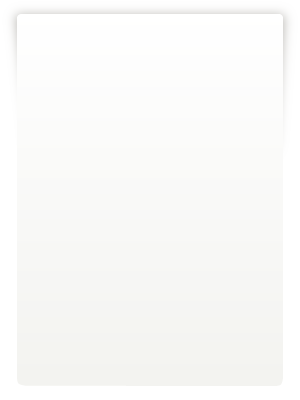
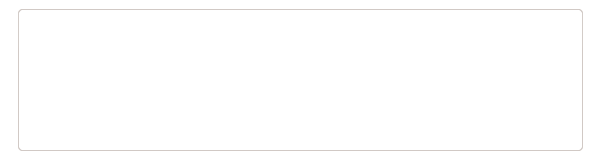
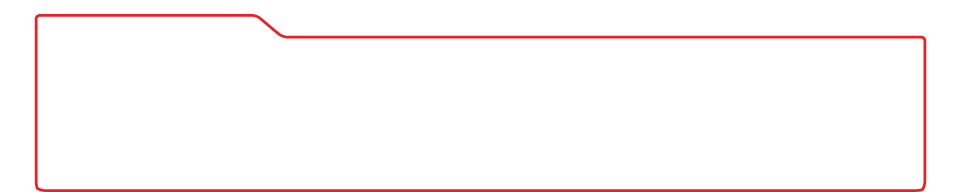
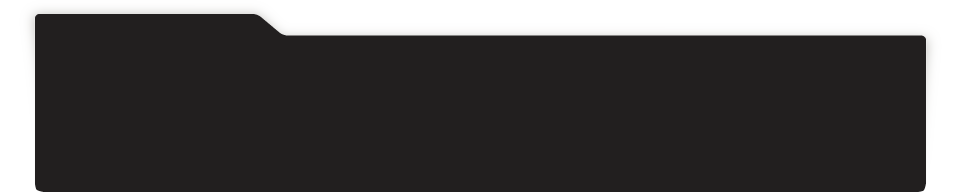
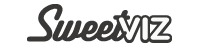
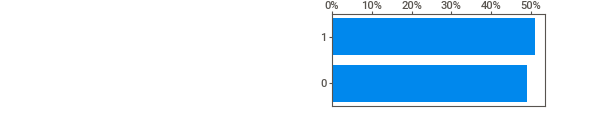
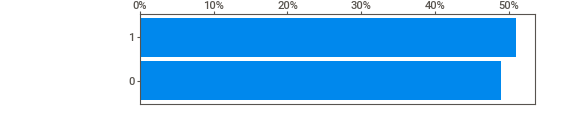
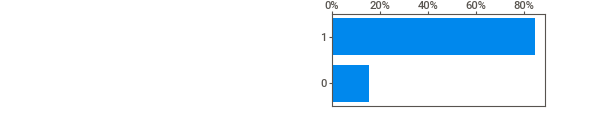
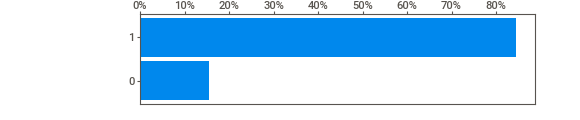
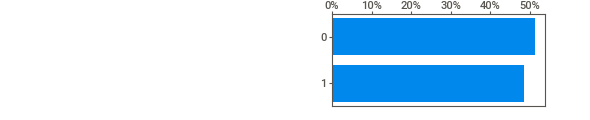
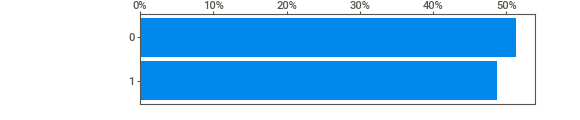
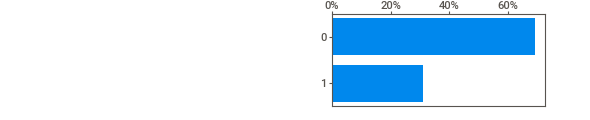
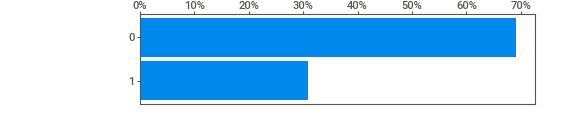
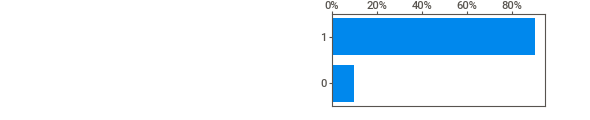
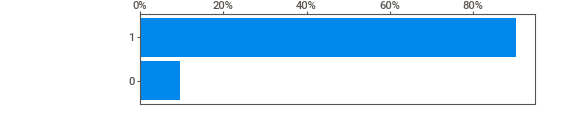
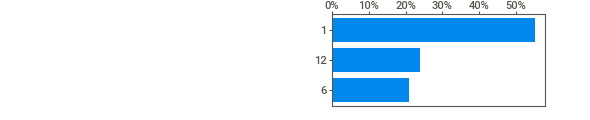
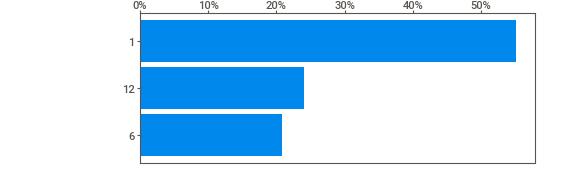
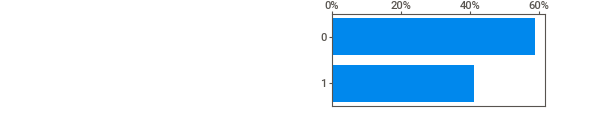
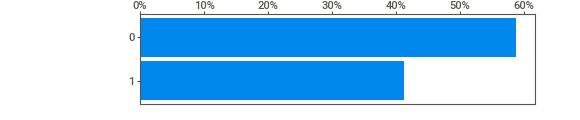
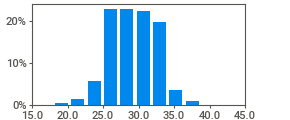
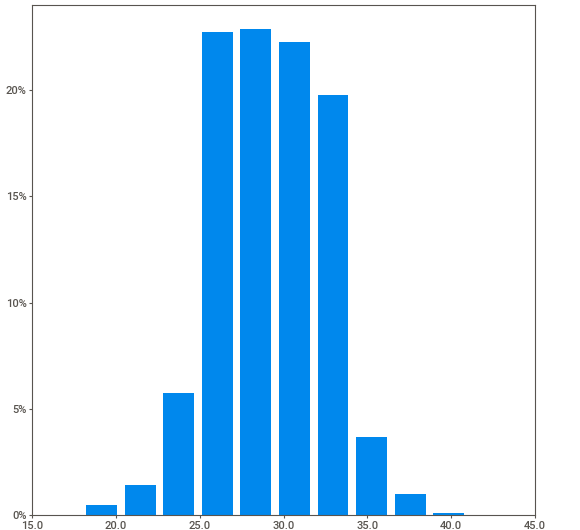
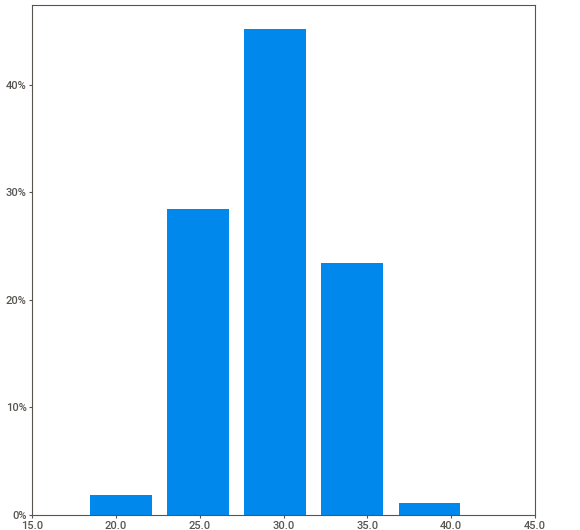
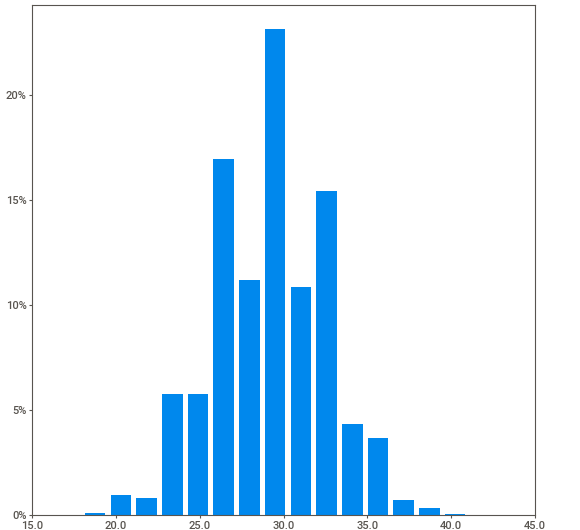
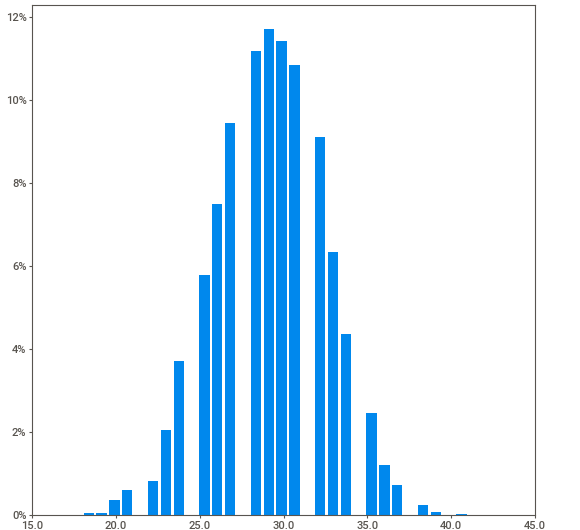
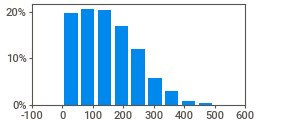
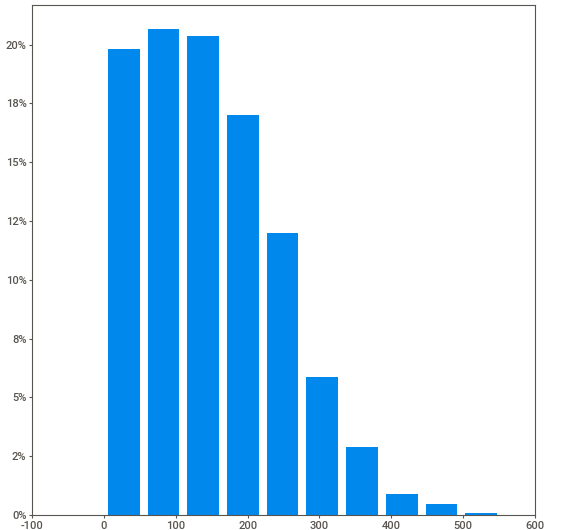
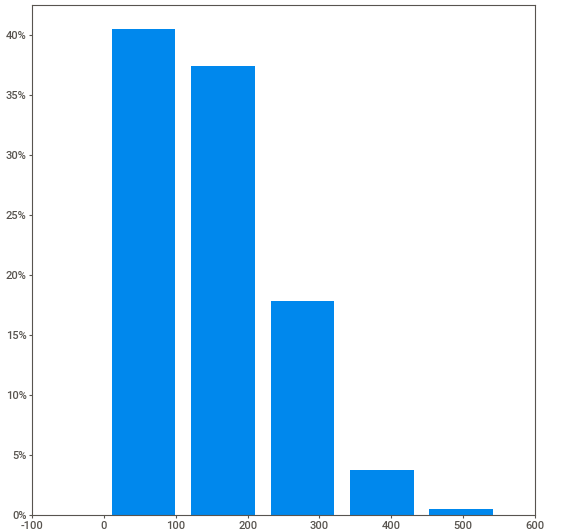
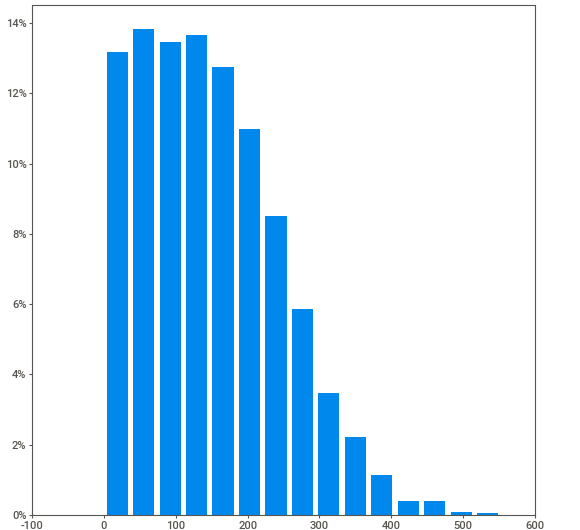
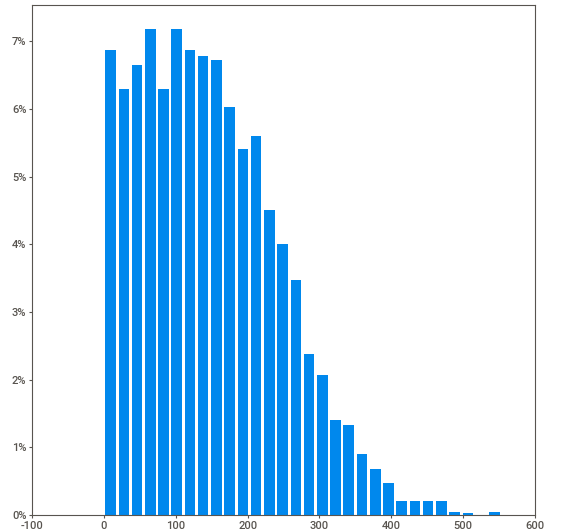
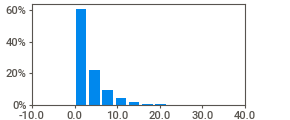
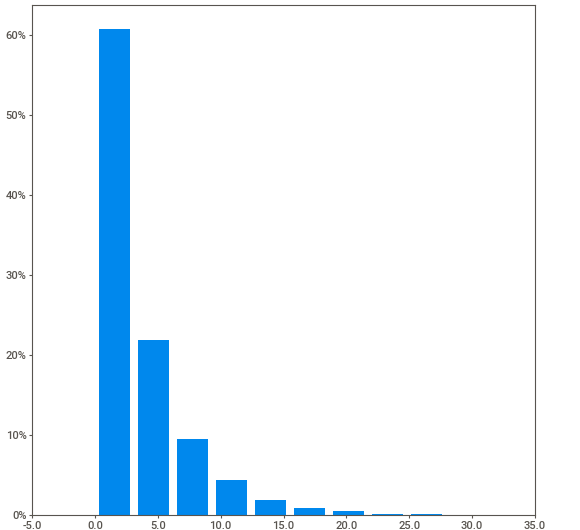
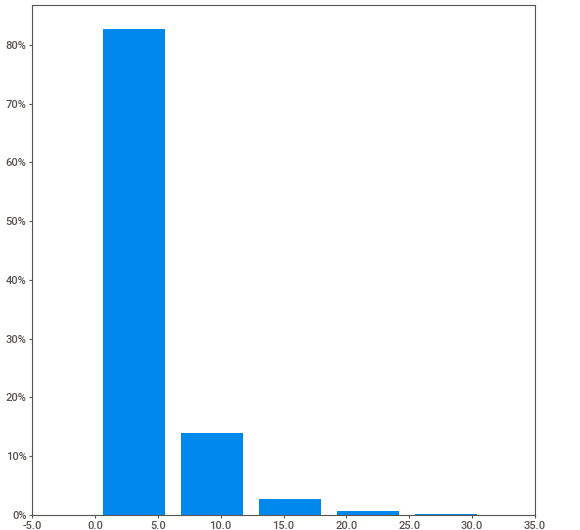
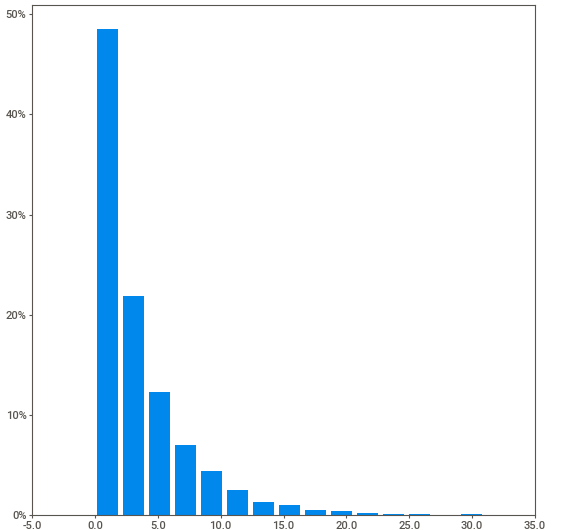
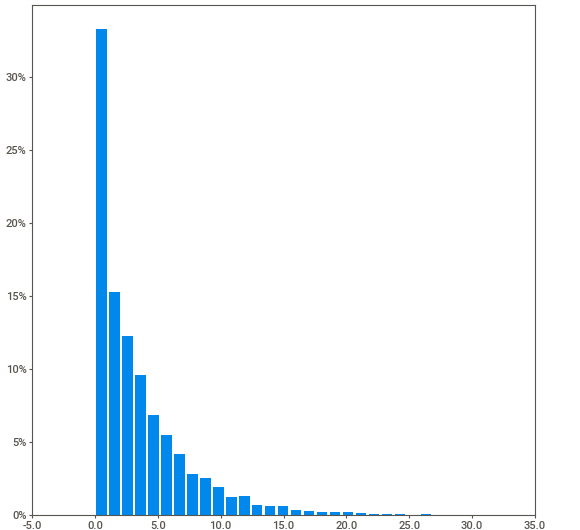
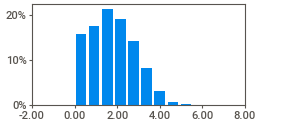
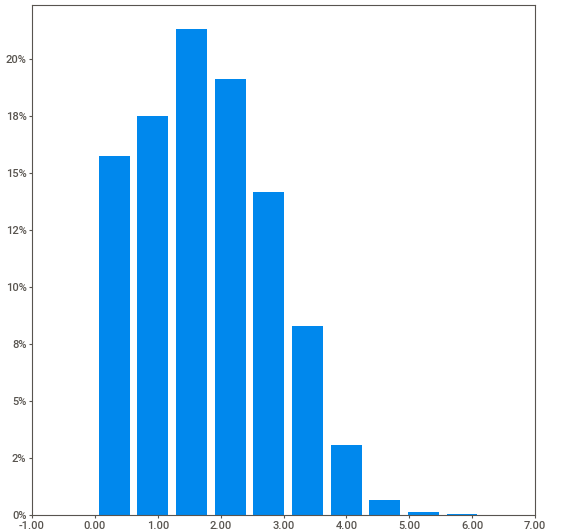
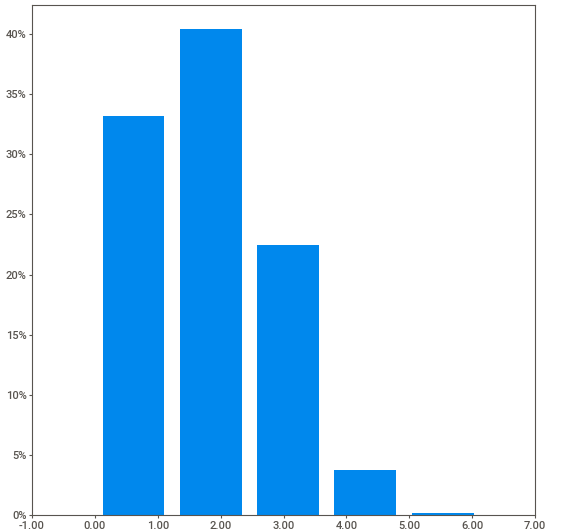
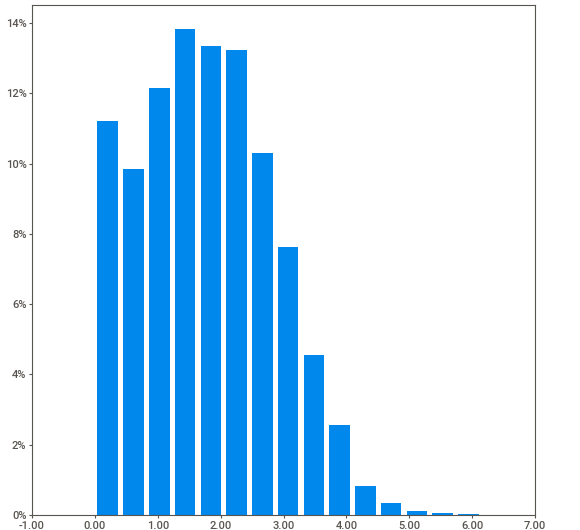
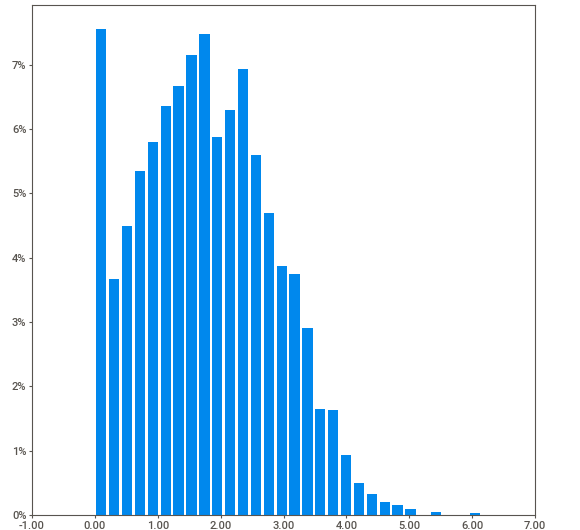
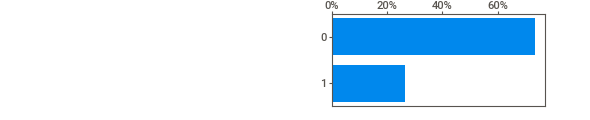
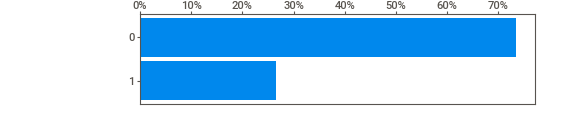
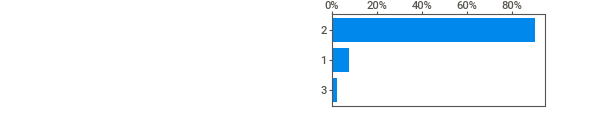
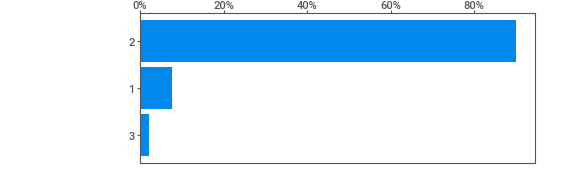
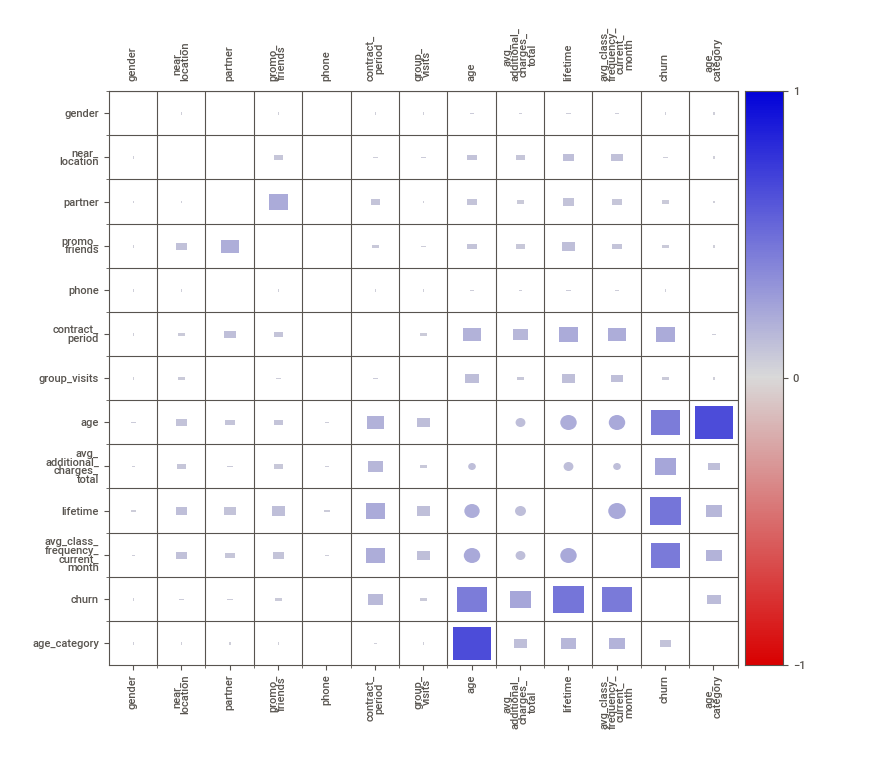
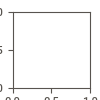

In [67]:
#ещё раз провизуализируем наш датасет по признаку оттока 
report.show_notebook()

In [68]:
train = pd.DataFrame(x_train_st, columns=x.columns)
test = pd.DataFrame(x_test_st, columns=x.columns)
comparison = sv.compare(train, test)

                                             |          | [  0%]   00:00 -> (? left)


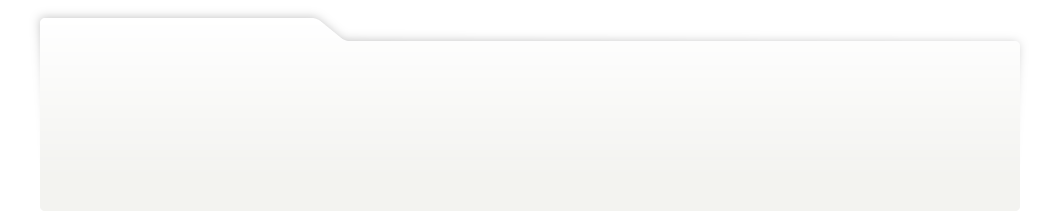
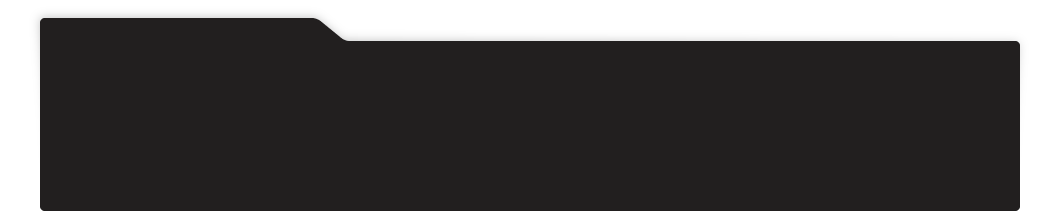
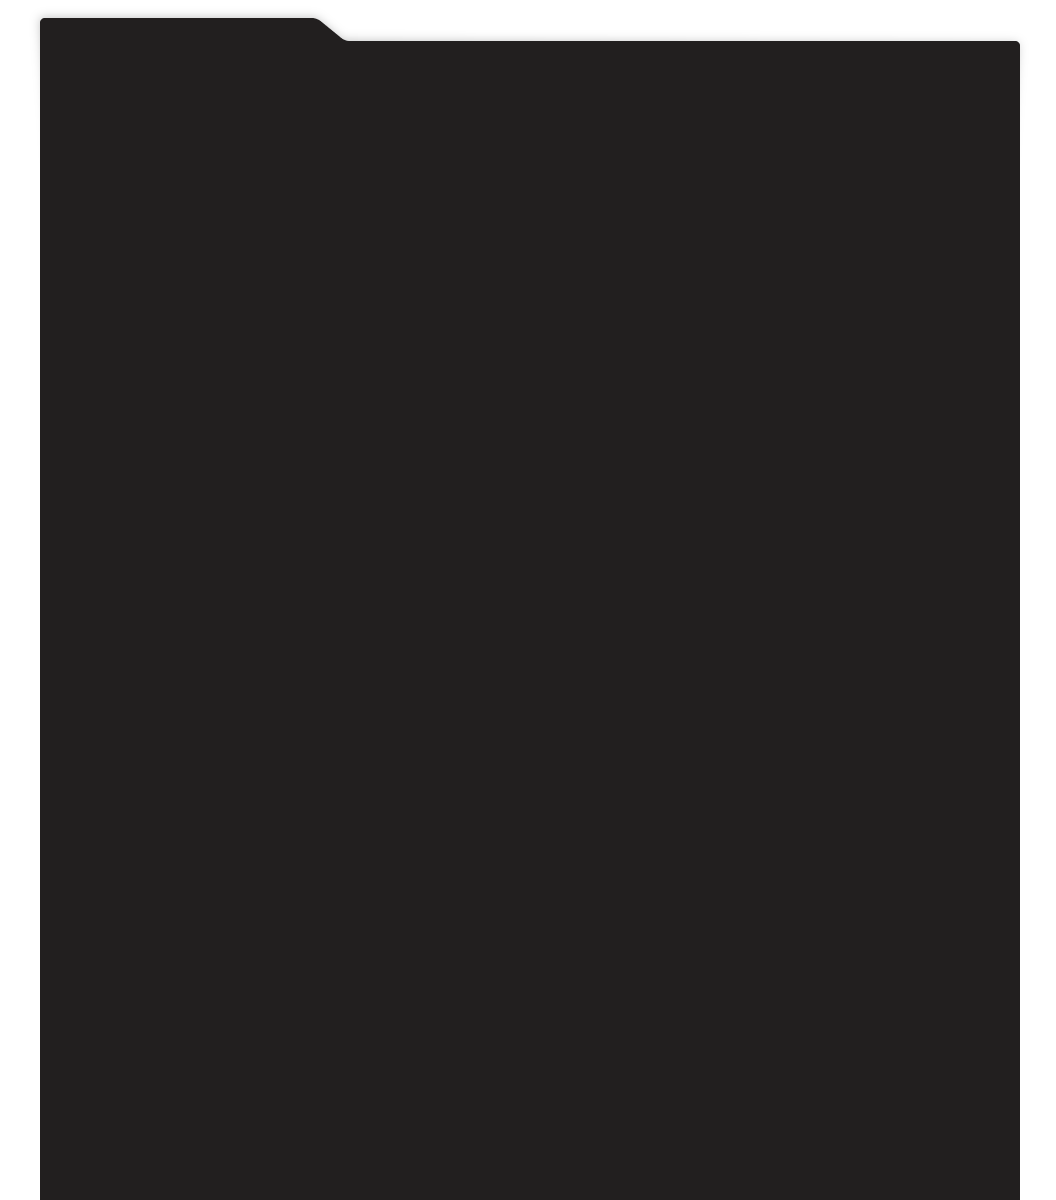
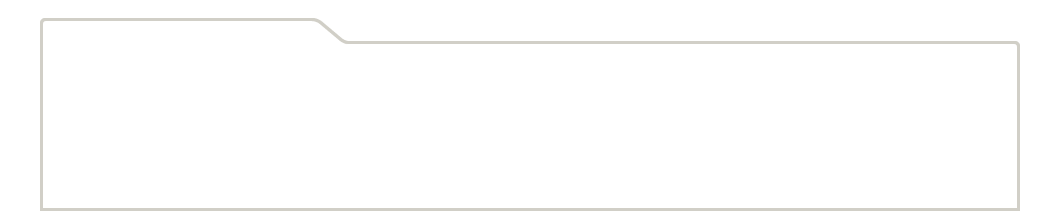
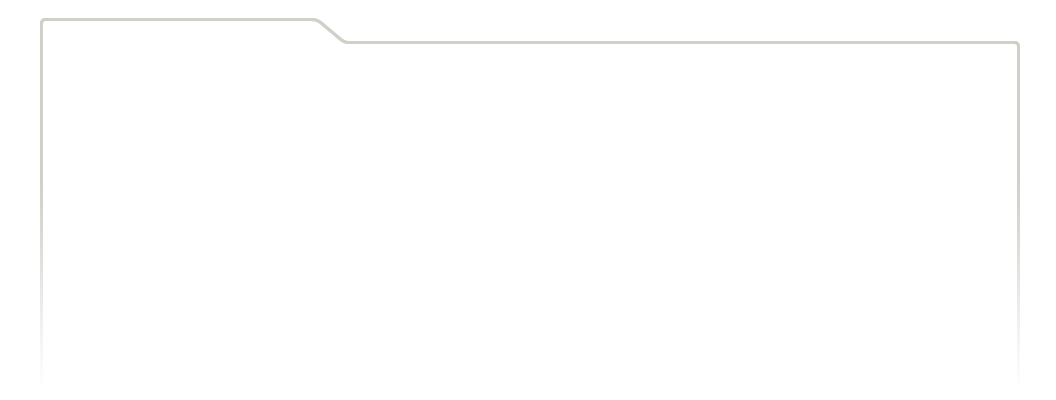
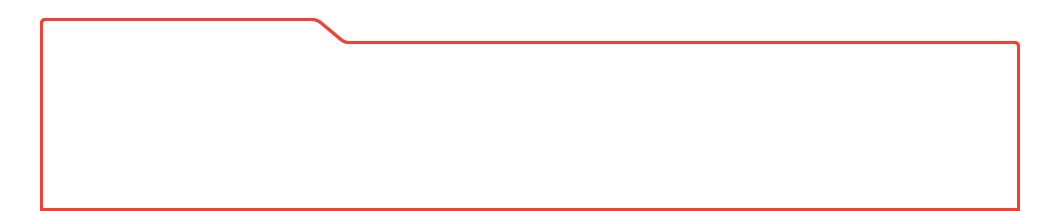
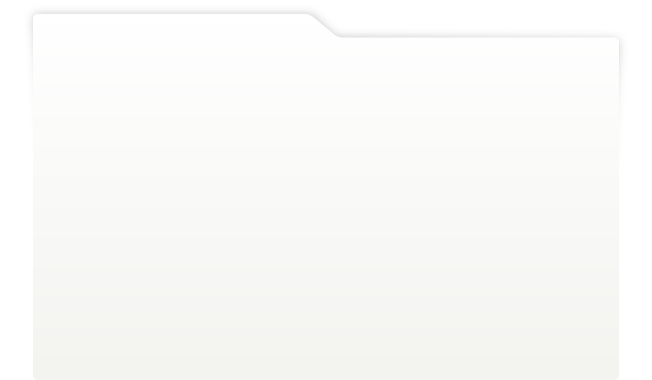
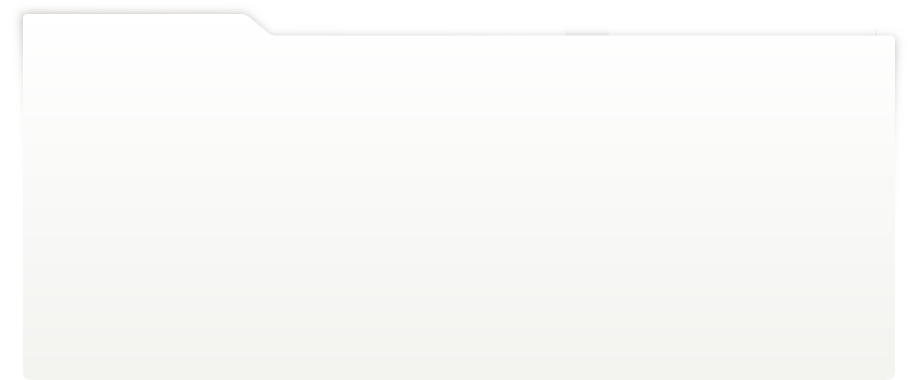
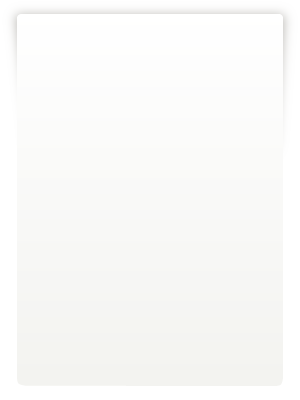
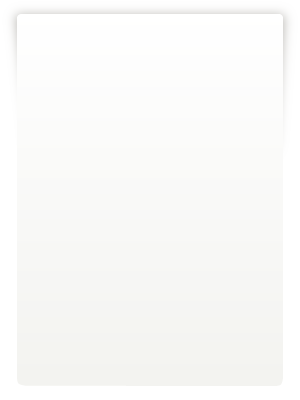
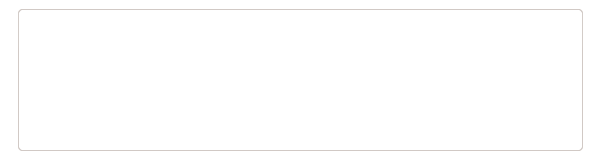
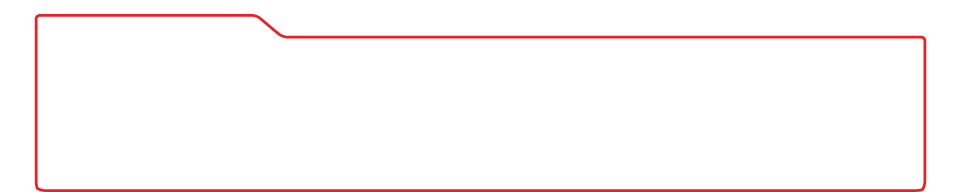
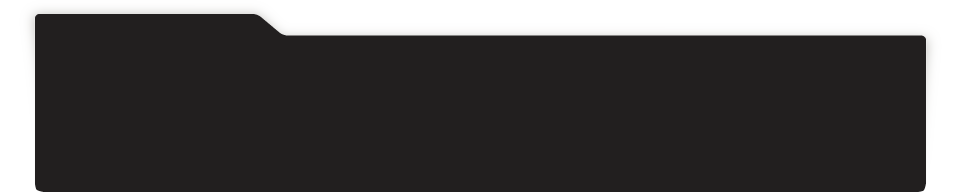
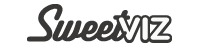
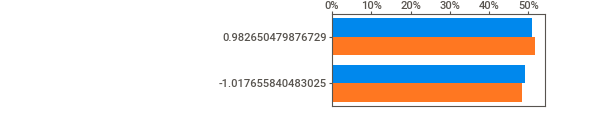
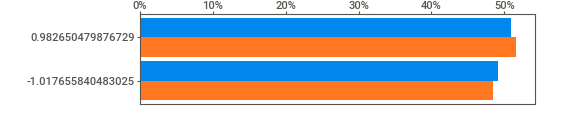
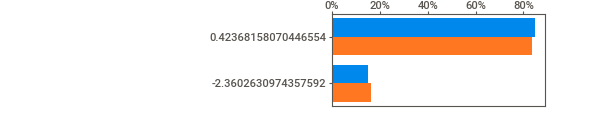
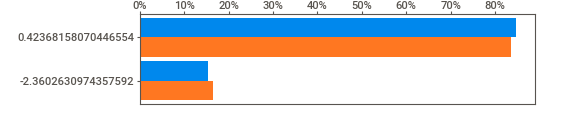
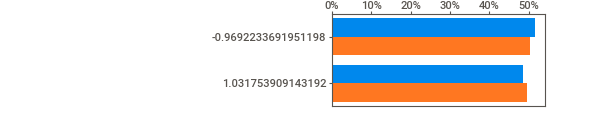
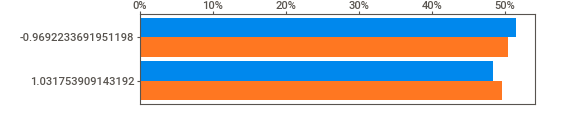
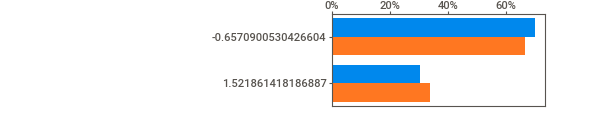
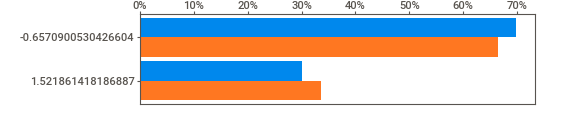
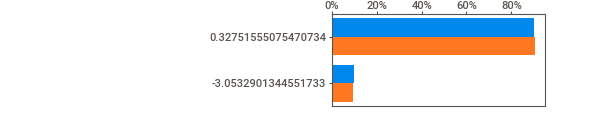
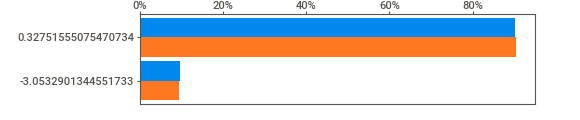
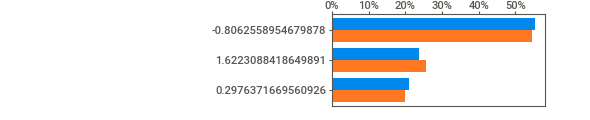
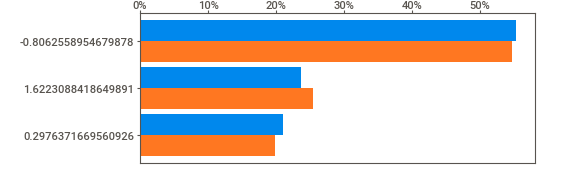
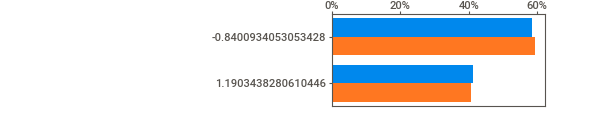
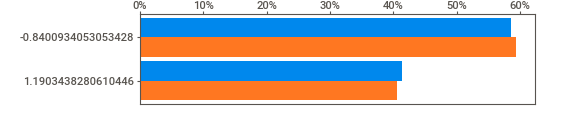
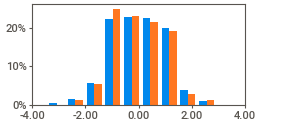
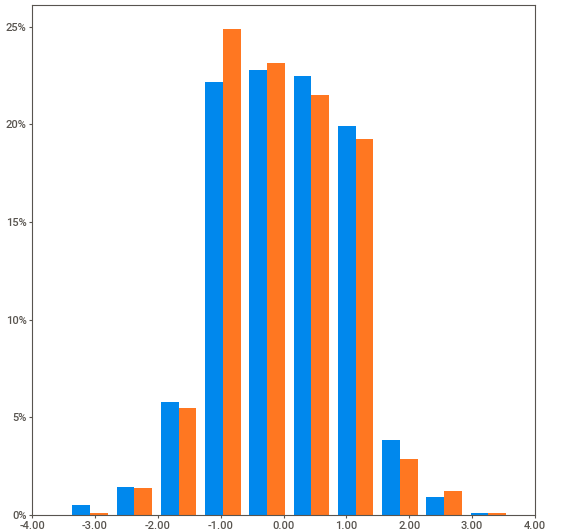
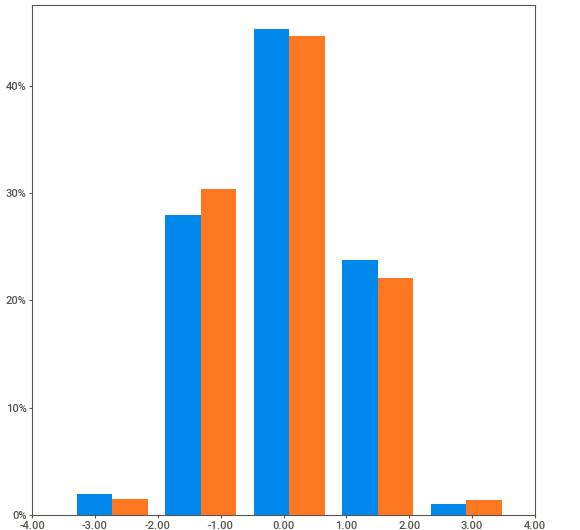
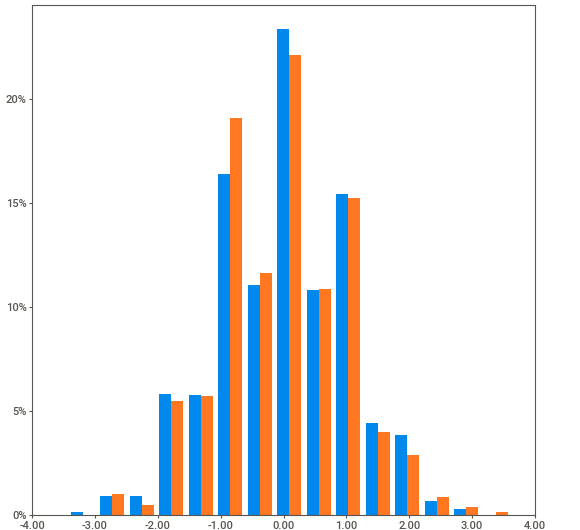
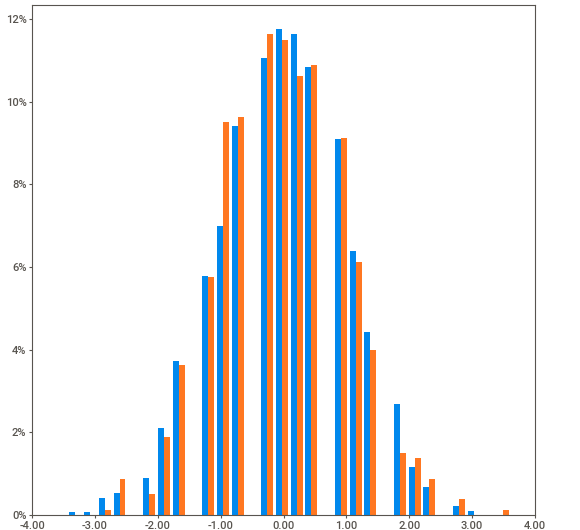
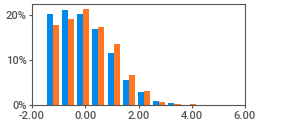
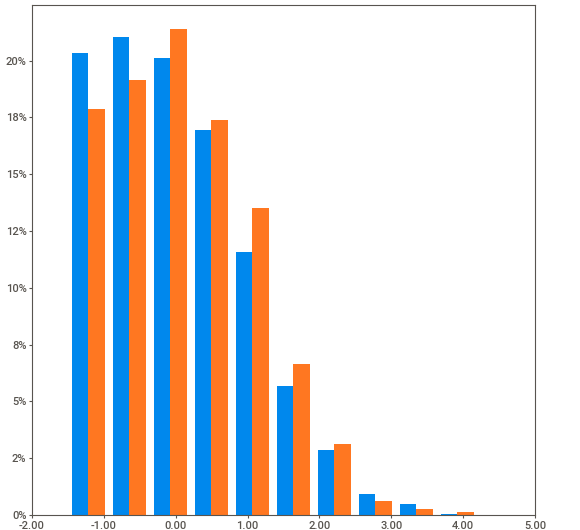
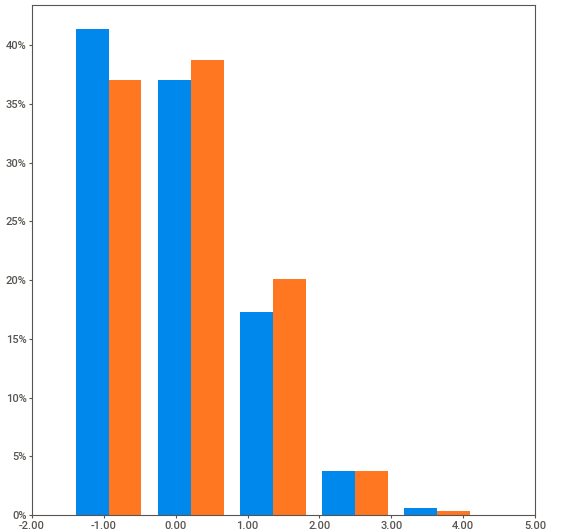
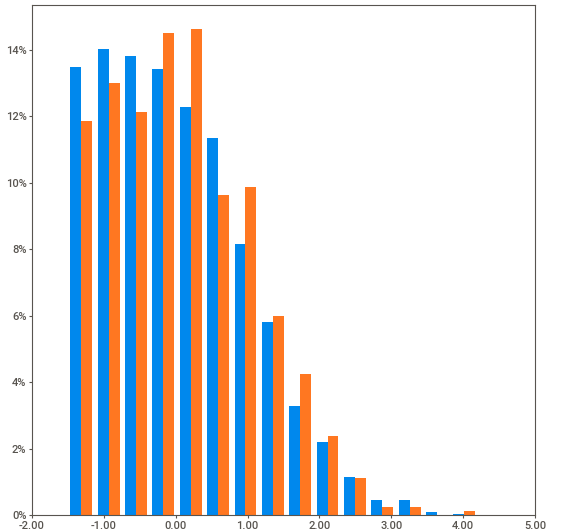
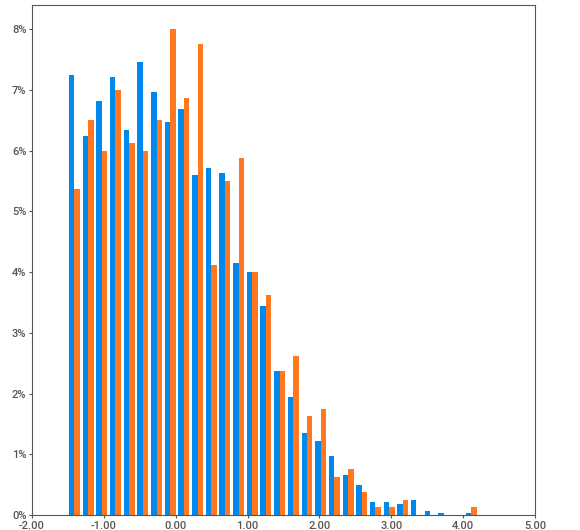
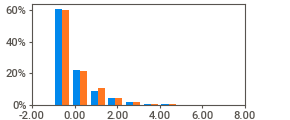
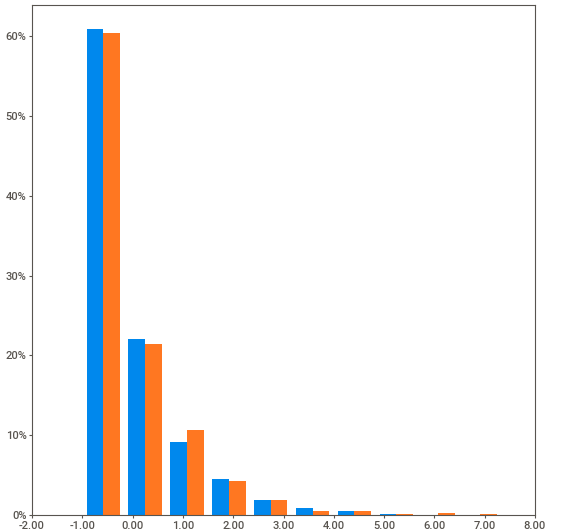
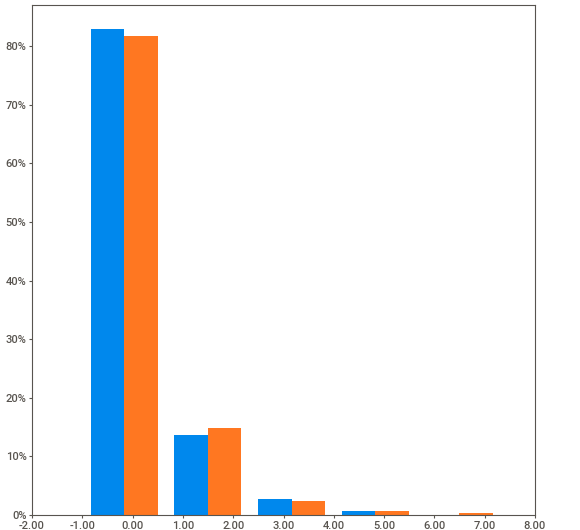
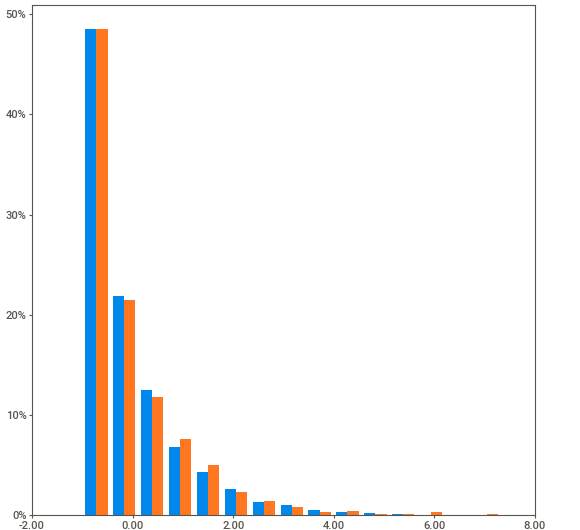
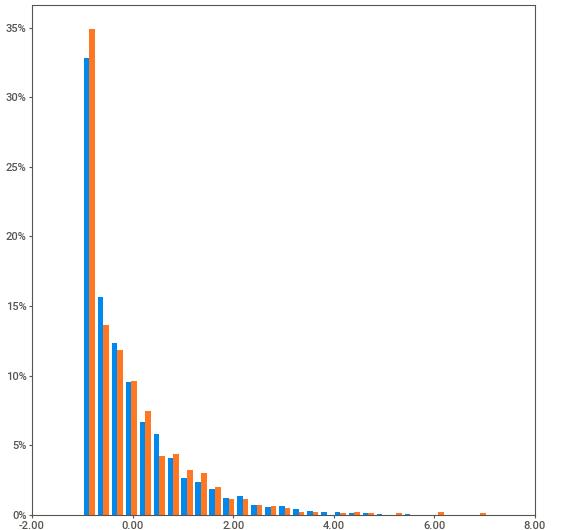
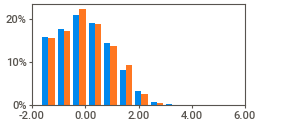
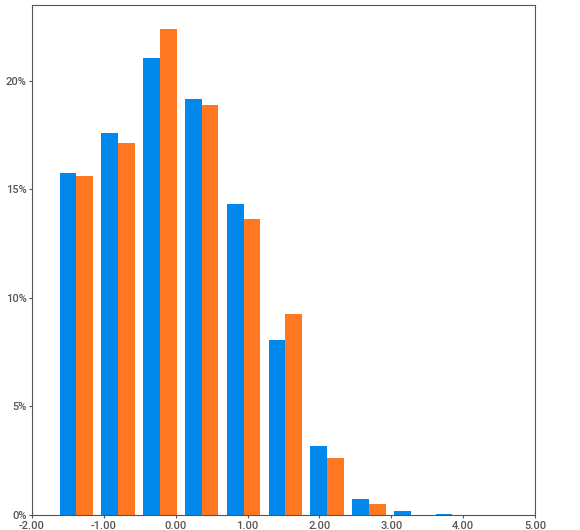
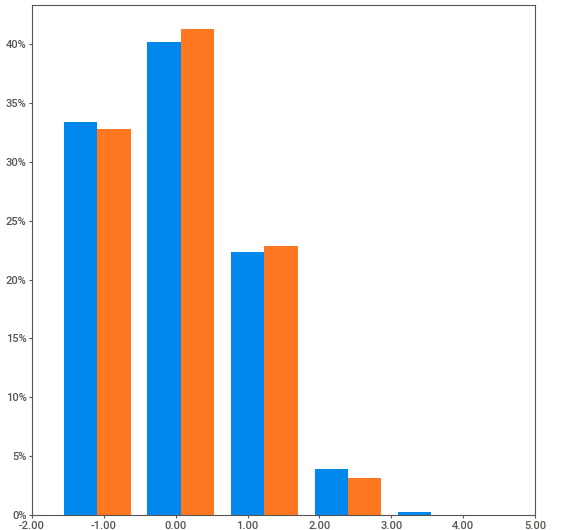
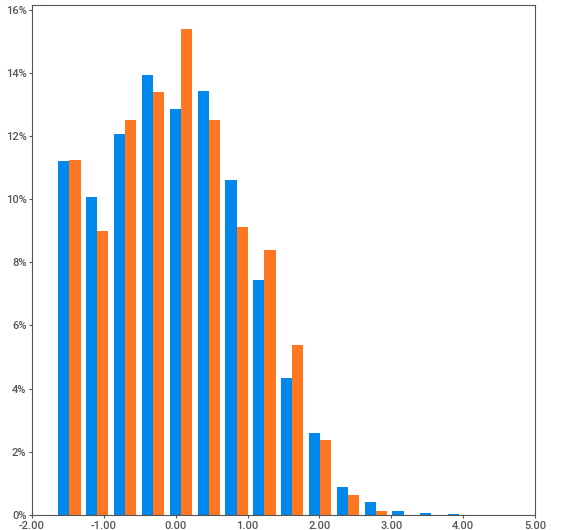
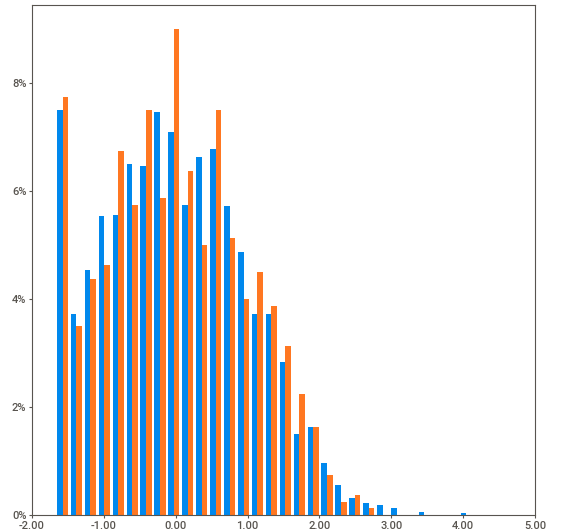
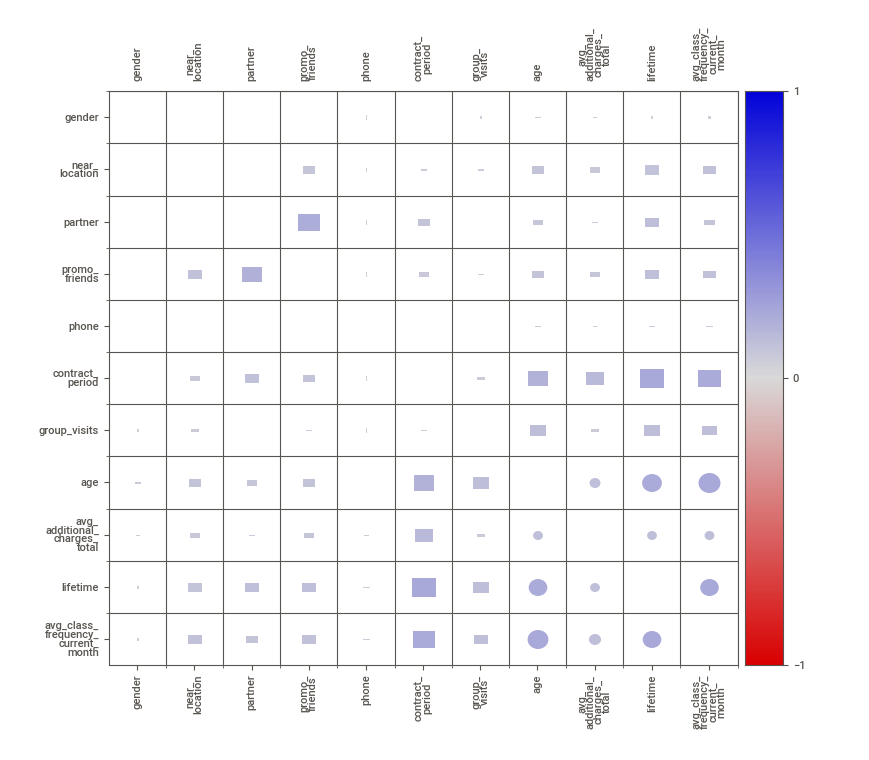
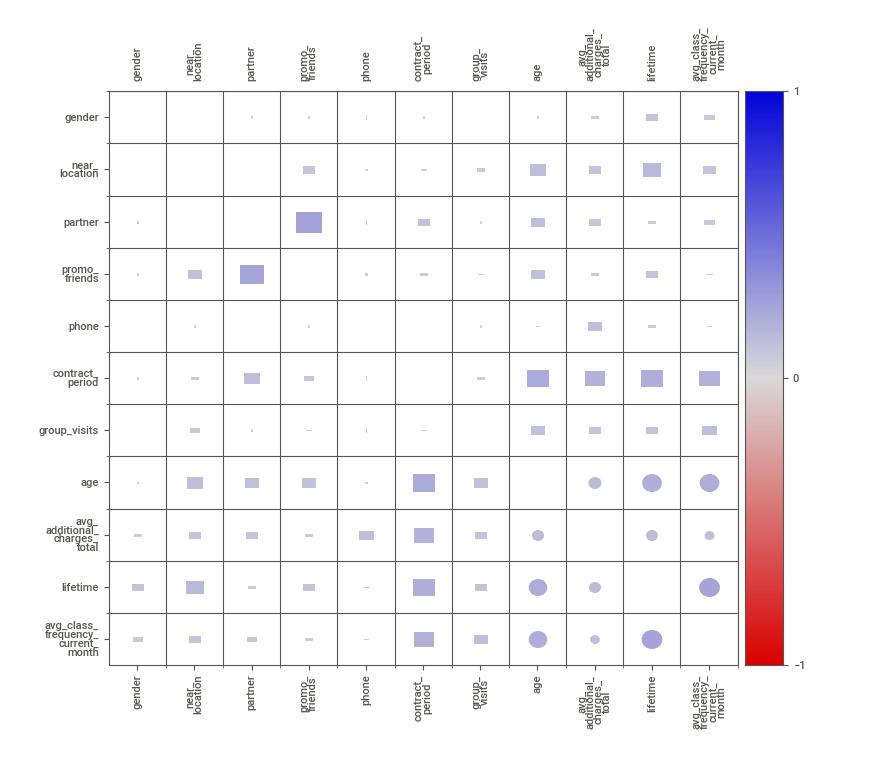

In [69]:
#Сравним стандартизированные обучающую и тестовые выборки. 
comparison.show_notebook()

За исключением каких-то моментов, выборки похожи. Чтобы рассмотреть данные по конкретным Series - нужно тыкнуть на интересующий признак. Полная документация по библиотеке: [https://github.com/fbdesignpro/sweetviz]

### Обучение и оценка качества модели
<a name='priznaki'></a>

In [70]:
# размерность обучающей
print(x_train_st.shape, y_train.shape)
 
# и тестовой выборки
print(x_test_st.shape, y_test.shape)

(3200, 11) (3200,)
(800, 11) (800,)


Попробуем начать обучение с логистической регресии - она служит для задачи классификации данных

In [71]:
# создадим объект этого класса и запишем в переменную model
model_log = LogisticRegression(random_state=0)
 
# обучим нашу модель
model_log.fit(x_train_st, y_train)

LogisticRegression(random_state=0)

In [72]:
#Воспользуемся обученной моделью, чтобы сделать прогнозы
log_predictions = model_log.predict(x_test_st)
log_probabilities = model_log.predict_proba(x_test_st)[:,1]

Обучим модель с помощью  "Случайный лес"

In [73]:
#Зададим алгоритм для модели
for_model = RandomForestClassifier(random_state=0)

#Обучим модель
for_model.fit(x_train_st, y_train)

#Воспользуемся обученной моделью, чтобы сделать прогнозы
for_predictions = for_model.predict(x_test_st)
for_probabilities = for_model.predict_proba(x_test_st)[:,1]

Оценим метрики и сравним модели:

In [74]:
#Напишем функцию для вывода метрики
def print_metrics(y_true, y_pred, y_proba, model_name):
    print("Метрики для модели "+model_name)
    print('Доля правильных значений - Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Точность - Precision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('F1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [75]:
#Вывод метрик для модели Логистическая регрессия
print_metrics(y_test, log_predictions, log_probabilities, 'логистическая регрессия')
print()
#Вывод метрик для модели случайного леса
print_metrics(y_test, for_predictions, for_probabilities, 'случайный лес')

Метрики для модели логистическая регрессия
Доля правильных значений - Accuracy: 0.92
Точность - Precision: 0.85
Recall: 0.84
F1: 0.84
ROC_AUC: 0.97

Метрики для модели случайный лес
Доля правильных значений - Accuracy: 0.91
Точность - Precision: 0.85
Recall: 0.77
F1: 0.81
ROC_AUC: 0.96


* Accuracy: доля правильных ответов
* Precision: точность прогнозирования в пределах класса 
* Recall: количесто исстино положительных результатов
* F1: обобщеная оценка метрик Precision и Recall 

Вообще, сложно сказать какая из моделей показала себя лучше. В доле правильных ответов они оказались равны. По точности - модель случайный лес немного выигрывает. Зато в количестве истинно положительных результатов выигрывает логистическая регрессия. По обобщённой оценке метрик выигрывает логистическая регрессия. ROC_AUC отражает насколько точно классификатор выдает вероятности классов. В плохой модели он будет стремиться к 0.5, в хорошей к 1. Логистическая реграссия выиграла и тут. 
____________________
Подводя итог, будем считать что более удачной моделью для данной задачи будет - логистическая регрессия.

### Кластеризация клиентов
<a name='clasters'></a>

Отложим в сторону столбец с оттоком и проведём кластеризацию объектов (клиентов), для этого:
1. Стандартизируем данные.
2. Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.
3. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 
4. Договоримся за число кластеров принять n=5.
5. Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
6. Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?
7. Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

Алгоритм К-Means очень чувствителен к масштабу признаков, из-за этого необходима нормализация данных. 

In [76]:
# создадим объект этого класса
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
x_st = scaler.fit_transform(x)

In [ ]:
#Сохраним матрицу расстояний
links = linkage(x_st, method = 'ward')

#Построим дендрограмму
plt.figure(figsize=(15, 10))
plt.title('Кластеризация пользователей фитнес-клуба')
dendrogram(links, orientation='top')
plt.show()

Выделилось 4 кластера клиентов, однако, мы видим, что последний кластер можно разделить ещё минимум на 2 кластера. Согласно условиям задачи мы и будем считать, что кластеров 5 (отделяется последний 5 от 4 кластера чисто визуально). Поэтому, согласимся с условиями задачи на число кластеров n=5. 

In [ ]:
#построим матрицу
km = KMeans(n_clusters = 5, random_state = 0) #Задаём число кластеров, равное 5
labels = km.fit_predict(x_st) #Применяем алгоритм K-Means к данным и формируем вектор кластеров
df['cluster'] = labels #Добавим столбец с номерами кластеров в исходный датафрейм
df.head()

In [ ]:
df.groupby('cluster').mean().T #Посмотрим на средние значения признаков для кластеров.

Что можно сразу сказать из полученной таблицы:
Гендер - По полу кластеры разделились примерно одинаково (туда попало примерно равное число мужчин/женщин).\
Близость от работы дома - здесь мы уже видим, что кластер (1) это люди, живущие и работающие далеко от клуба. Остальные кластеры - рядом с фитнес клубом.\
Сотрудник компании партнёра - в кластере (0) много людей, которые работают в компании партнёре фитнес-клуба, значит, клуб имеет сведения о работодателе людей из этого кластера.\
Пришли по акции приведи друга - мы видим, что в кластере 0,1,2 - больше людей, пришедших по этой акции, а в остальных - их мало.\
Дали телефон клубу - все кластеры, кроме последнего (4).\
Период контракта с клубом - два кластера имеют контракт в среднем на 6 месяцев (0, 3). 4 кластер - 4,7 месяце, остальные кластеры 2-3 месяца.\
Посещают групповые занятия - 0, 3 кластеры - больше любят групповые занятия, чем 1,2,4. \
Возраст - самый "младший" кластер это 2. Остальные ближе к 30 годам (в среднем).\
Траты сверх контракта в клубе - в кластере с самыми молодыми посетителями клуба (2) и дополнительные траты самые малые (119 долларов), против остальных кластеров, где траты выше 130 долларов.\
Время жизни от начала контракта - снова, кластер 2 отличился по самому короткому времени "жизнИ" от начала контракта. Видимо, молодым людям не свойственно вообще посещать фитнес, так как это прерогатива старичков "за 30".\
Кол-во посещений центра в неделю за месяц - тут выделился 3 кластер, единственные, которые ходят 2 дня в неделю. Они же, кстати, больше всех оставляют денег в клубе. Они же, самый "старый кластер".\
Уйдут в отток в следующем месяце - кластер старичков (3) продолжает радовать своей стабильностью. Я их понимаю. Мне тоже 32 и я тоже не пропускаю занятия в своем фитнес центре, кстати, групповые. Если я не схожу на занятия, то моя спина помашет мне рукой. А вот в кластере 1 и 2 с самыми молодыми людьми, в отток уйдет много людей. 


In [ ]:
#Посмотрим на численность кластеров
df.cluster.value_counts()

### Распределение признаков в кластере
<a name='priznak'></a>

In [ ]:
#Построим графики для бинарных признаков
for col in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5,3))
    plt.title('Распределение признака в кластере - '+ col)
    plt.xlabel(col)
    sns.countplot(x = df[col], hue='cluster', data=df, palette="pastel")
    plt.show()

In [ ]:
#небинарные признаки
columns = ['age', 'lifetime','avg_class_frequency_current_month', 'avg_additional_charges_total']
for col in columns:
    plt.figure(figsize=(5, 3))
    plt.title("Распределение признака в кластере - "+col)
    sns.boxenplot(x='cluster',y=col, data=df, palette="cubehelix", scale="linear")
    plt.xlabel('Кластер')
    plt.ylabel('Значение признака')
    plt.show()

**Вывод:**
В кластере 1 много людей, живущих или работающих далеко от фитнес-клуба.\
В кластере 0 много людей, пришедших по партнерской программе, а в кластерах 2 и 3, наоборот - в основном самотёк.\
В кластере 2 и 3 - почти нет людей, которые пришли по акции "приведи друга", а в кластере 0 - почти все такие.\
4 кластер, почему-то, не захотел поделиться номером своего телефона с клубом.\
Во 2 кластере не очень любят групповые занятия.\
Во 2 кластере самые младшие по возрасту, в 3 кластере самые старшие.\
В 3 кластере люди дольше всех в клубе.\
Меньше всего денег в клубе оставляют товарищи из 2 кластера, больше всего дополнительные расходу несут люди из кластеров 0 и 3.\
Больше всего дней в спортзале в неделю проводят клиенты из 3 кластера, а меньше всех из 2.
Собственно, таблица выше подтвердилась. 


In [ ]:
display("Доля ушедших клиентов:",df.groupby('cluster')['churn'].mean().round(2))

Если говорить о доли клиентов, которые ушли в конкретном кластере, то больше всего ушло в кластере номер 2 (56% клиентов). А меньше всего ушло клиентов в кластере 3 - всего 1 % клиентов от общего числа клиентов в конкретном кластере. Так же, много клиентов ушло в кластере 1. 

In [ ]:
df.cluster.value_counts()

In [ ]:
display('Доля ушедших клиентов с учётом всех клиентов',df.groupby('cluster')['churn'].sum()/df['churn'].sum())

Если говорить о доли клиентов, ушедших, от общего числа клиентов клуба (4000 человек), то больше всего ушло, все равно, во 2 кластере (56%), а меньше всего от общего числа ушло клиентов, тоже, в 3 кластере (1 %). 

## Общий вывод:
<a name='end'></a>

Предоставленная база данных не имела пропусков, дубликатов, не было обнаружено каких-либо критических проблем, ошибок, база хорошо собрана и заполнена.

_____________________

Для машинного обучения применяли 2 модели: "логистическая регрессия" и "случайный лес". В ходе проверки этих моделей не удалось выявить "лучшую" модель, хотя немного выигрывает логистическая реграссия. При необходимости можно использовать обе модели. 

____________________
Тестовая и валидационная выборки были практически одинаковы.

____________________

После применения стандартизации - была проведена кластеризация с помощью k-means методики. Было принято решение делить клиентов на 5 групп (кластеров). 
____________________

В результате разделения клиентов на 5 кластеров, удалось выявить 2 наиболее ярких:\
кластер 2 - куда входят клиенты младше 28 лет, с более низким уровнем дохода, они заключают контракт с фитнес центром всего на 1 месяц и потом быстро исчезают и не возвращаются на занятия. Ходят на занятия всего 1 раз в неделю.\
кластер 3 - куда входят клиенты старше 30 лет, с более высоким уровнем дохода. Они заключают контркт с фитнес центром практически всегда на 6 месяцев, ходят в центр 2 раза в неделю, при этом, они не исчезают и продолжают упорно заниматься фитнесом.\
_____________________

Интересно отметить, что есть кластер клиентов, который не делится своим номером телефона. 

_____________________
Для нашего фитнес клуба **идеальным** клиентом оказался следующий портрет:
Мужчина или Женщина старше 30 лет, любитель групповых программ, имеющий подругу или друга в том же фитнес клубе (или даже коллегу), пришедший в клуб от своего работодателя, любитель кислородных коктейлей или массажев.\
**Не идеальный** клиент:
Мужчина или Женщина младше 27 лет, живущий далеко от клуба, взявший контракт с клубом всего на 1 месяц, пришедший в клуб "самотёком" без друга или подруги, без коллеги и не от работы, худший вариант - ещё и из другого района места жительтельства, студент или работник с невысоким доходом.

_____________________

Какие признаки, как нам кажется, в целом влияют на целевой признак? Похоже, во многом это возраст. Возрастные клиенты более надежны для данного фитнес центра. 

_____________________

**Рекомендации**
1. Обратить внимание на то, что молодёжь не задерживается в клубе. Если клубу интересно сохранить при себе данную категорию клиентов, возможно, необходимо принять меры. Например: организовывать вечерники знакомств в клубе. Данная категория клиентов часто приходят самотёком по одиночке, а как показал анализ выше - одиночки в клубе не задерживаются. Необходимо помочь клиентам данного возраста найти себе "друга" по клубу. 
2. Периодически проводить какие-нибудь акции для клиентов младше 27 лет. Например, более дешевый абонемент сразу на 6 месяцев. Или попробовать предлагать таким клиентам длительный абонемент в рассрочку. В общем цель - завлечь данную категорию на более длительное посещение спорт зала. 
3. Обратить внимание, что клиентами ценятся групповые тренировки и многие клиенты, видимо, пришли по акции "приведи друга" от своих коллег по работе, причем, это работники компаний партнеров фитнес-центра. Поэтому, для таких клиентов можно было бы периодически проводить приветственные акции, для того, чтобы они покупали абонемент на 12 месяцев. Делать его более дешевым, или, снова, предложить им рассрочку. Для того, чтобы эта категория клиентов ходила не 6 месяцев в клуб, а 12. 
4. Так как очень хорошо работают партнерские программы - их необходимо расширять. Возможно, можно попробовать найти партнеров среди университетов или институтов, чтобы расширить базу "молодых" клиентов в фитнес-центре. 
5. Может быть, стоит добавить в групповые занятия такие, которые более интересны молодым, например какие-нибудь современные танцы, чтобы молодые люди ходили туда с интересом и удовольствием.
6. Обратить внимание на то что в центре не задерживаются клиенты из других районов. Это нормально, стоит быть готовыми к тому, что если в клуб случайно попадает такой человек, то он, скорее всего, не задержится. Если эти люди важны клубу, то удержать их возможно только какими-либо уникальными предложениями, которых нет в соседних клубах в других районах. Возможно, стоит рассмотреть расширение процедур какими-нибудь необычными. 